<h3 style="text-align: center;">PROBABILIDADE DE CHURN EM EMPRESA DE TELECOMUNICAÇÃO</h3>

### Descrição do problema

Uma empresa de Telecomunicações deseja melhorar a retenção de clientes em sua base. Ou seja, deseja reduzir o seu Índice de Churn. Foram disponibilizadas duas bases de dados que totalizam 3.333 clientes da empresa, com diversas informações a respeito deles e, para cada linha, um Target informando se o cliente cancelou ou não o serviço.

Assim, será elaborada uma Análise Exploratória de Dados (EDA) das bases de dados forneceidas e serão treinados e avaliados nove modelos de classificação de Machine Learning (Regressão Logística, Árvore de Decisão, Bagging de Regressão Logística, Random Forest, AdaBoost, Gradient Boosting, XG Boost, LightGBM e CatBoost) para avaliar o Churn da empresa.

Por fim, serão propostas ações que contribuam para a melhoria da retenção de clientes na empresa.

### Informações do Dataset

- **State**: Estados do Estados Unidos
  
- **Account length**: Período de tempo que a pessoa é cliente da empresa

- **Area code**: Código de área do número de telefone do cliente

- **International plan**: Informa se o cliente possui Plano Internacional ou não

- **Voice mail plan**:  Informa se o cliente possui Plano de Correio de Voz

- **Number vmail messages**: Quantidade de mensagens de correio de voz

- **Total day minutes**:  Total de minutos que o cliente usa durante o dia

- **Total day calls**:  Quantidade de ligações que o cliente realiza durante o dia

- **Total day charge**: Custo das chamadas realizadas durante o dia

- **Total eve minutes**: Total de minutos que o cliente usa durante o início da noite

- **Total eve calls**: Quantidade de ligações que o cliente realiza durante o início da noite

- **Total eve charge**: Custo das chamadas realizadas durante o início da noite

- **Total night minutes**: Total de minutos que o cliente usa durante a noite

- **Total night calls**: Quantidade de ligações que o cliente realiza durante a noite

- **Total night charge**: Custo das chamadas realizadas durante a noite

- **Total intl minutes**: Total de minutos que o cliente usa em ligações internacionais

- **Total intl calls**: Quantidade de ligações internacionais que o cliente realiza

- **Total intl charge**: Custo das chamadas internacionais

- **Customer service calls**: Quantidade de ligações que o cliente realizou para o Centro de Atendimento ao Cliente

- **Churn**: Target que identifica se o cliente cancelou ("deu churn") ou não o seu serviço. True = 1 = Cancelou. False = 0 = Não Cancelou


### Importação das Bibliotecas

In [7]:
# Módulos de manipulação de dados
import numpy as np
import pandas as pd

In [8]:
# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Pacotes de modelagem
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [10]:
# Métricas de Desempenho
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from scipy.stats import ks_2samp
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [11]:
# Bibliotecas para Tunagem de Hiperparâmetros
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import optuna
roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
recall_scorer = make_scorer(recall_score, average='binary')
precision_scorer = make_scorer(precision_score, average='binary')

### Importação das Bases de Dados

- Iremos importar a base de dados 'churn-80.csv' para realização do treinamento dos modelos. Uma variável que chamaremos de 'df_treino' irá receber esses dados.

- E iremos importar a base de dados 'churn-20.csv' para realização dos testes dos modelos. Uma variável que chamaremos de 'df_teste' irá receber esses dados.

- Mas, para a Análise Exploratório de Dados (EDA) iremos analisar todas as linhas das duas bases de dados. Para tanto, iremos concatenar as linhas das duas bases de dados usando a função pd.concat do Pandas. Uma variável que chamaremos de 'df_completo' irá receber todos os dados das duas bases.

- Utilizar todos os dados para realizar a Análise Exploratória de Dados (EDA) é importante porque irá nos fornecer uma visão abrangente dos dados. Isso ajuda a entender a distribuição e as características gerais do dataset, o que é fundamental para qualquer análise subsequente.

#### Importação da base de treinamento

In [15]:
df_treino = pd.read_csv('churn-80.csv')

#### Importação da base de teste

In [17]:
df_teste = pd.read_csv('churn-20.csv')

#### Concatenação das linhas das duas bases

In [19]:
df_completo = pd.concat([df_treino, df_teste], ignore_index=True)

Agora iremos verificar se a concatenção está trazendo todas as linhas das duas bases de dados. Ou seja, iremos verificar se a quantidade de linhas da base de dados concotenada é igual à soma das linhas de cada base de dados:

In [21]:
print(f"Shape do DataFrame da Base de Treinamento: {df_treino.shape}")

Shape do DataFrame da Base de Treinamento: (2666, 20)


In [22]:
print(f"Shape do DataFrame da Base de Teste: {df_teste.shape}")

Shape do DataFrame da Base de Teste: (667, 20)


In [23]:
# Verificar o tamanho do DataFrame combinado
print(f"Shape do DataFrame combinado: {df_completo.shape}")

Shape do DataFrame combinado: (3333, 20)


Podemos verificar, acima, que a soma das linhas duas bases em separado (2666 linhas + 667 linhas) está igual à quantidade de linhas da base concatenada (2666 + 667 = 3333 linhas). E notamos que todas as bases possuem as mesmas 20 colunas.

### Preparação dos Dados

 ### *Missing Values*

In [27]:
df_completo.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**A base de dados não apresenta dados faltantes.**

### Duplicações

In [30]:
df_completo.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

**A base de dados não apresenta dados duplicados.**

### Tipos de Variáveis

In [33]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [34]:
print(f'A base de dados tem {df_completo.shape[0]} linhas e {df_completo.shape[1]} colunas.')

A base de dados tem 3333 linhas e 20 colunas.


In [35]:
df_completo

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
3329,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
3330,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
3331,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


### Transformações

Iremos transformar a coluna Churn de booleano para valor inteiro. Nas linhas em que o Churn é True, ele será convertido para 1. Nas linhas em que o Churn é False, ele será convertido para 0. Essa transformação será importante em momentos da nossa análise, como no cálculo do Information Value (IV)

In [38]:
df_completo.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [39]:
df_completo['Churn'] = df_completo['Churn'].astype(int)
df_treino['Churn'] = df_treino['Churn'].astype(int)
df_teste['Churn'] = df_teste['Churn'].astype(int)

In [40]:
df_completo.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Análise Exploratoria de Dados (EDA)

### Análise Univariada das Variáveis Numéricas

#### Histograma de Account length

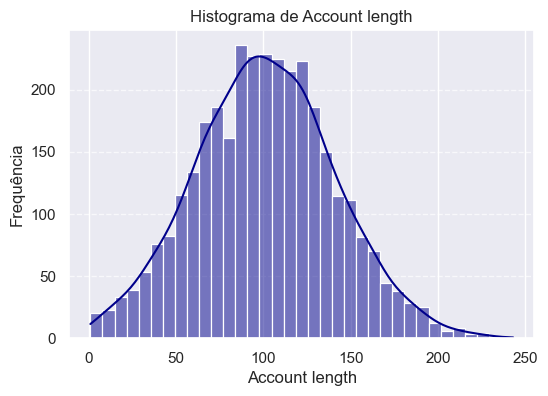

In [44]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Account length', kde=True, color='darkblue')

plt.title('Histograma de Account length')
plt.xlabel('Account length')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Number vmail messages

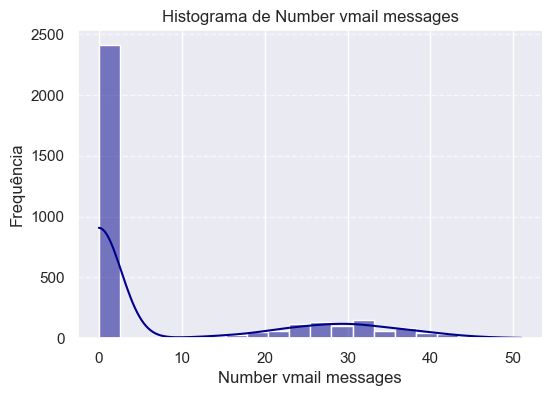

In [46]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Number vmail messages', kde=True, color='darkblue')

plt.title('Histograma de Number vmail messages')
plt.xlabel('Number vmail messages')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total day minutes

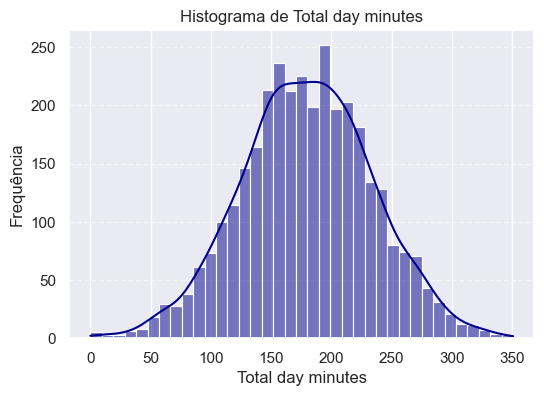

In [48]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total day minutes', kde=True, color='darkblue')

plt.title('Histograma de Total day minutes')
plt.xlabel('Total day minutes')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total day calls

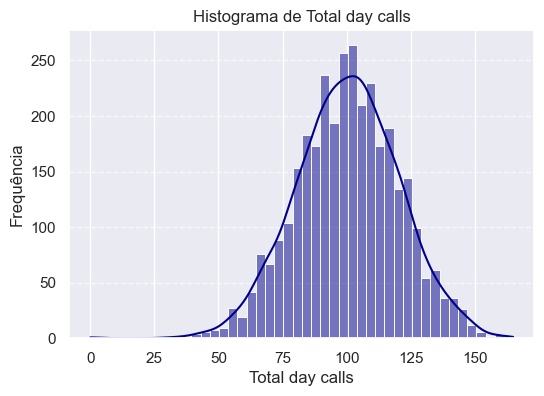

In [50]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total day calls', kde=True, color='darkblue')

plt.title('Histograma de Total day calls')
plt.xlabel('Total day calls')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total day charge

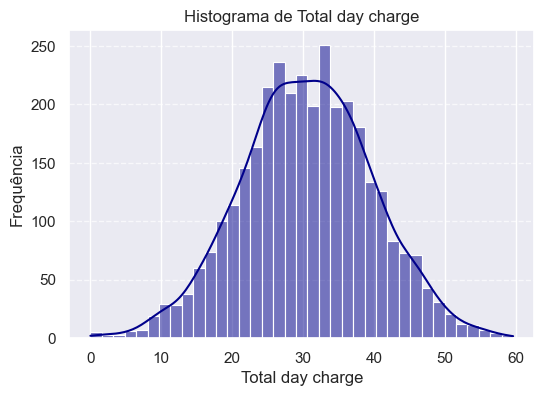

In [52]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total day charge', kde=True, color='darkblue')

plt.title('Histograma de Total day charge')
plt.xlabel('Total day charge')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total eve minutes

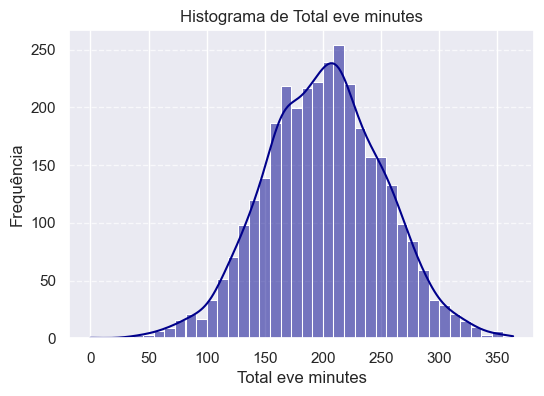

In [54]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total eve minutes', kde=True, color='darkblue')

plt.title('Histograma de Total eve minutes')
plt.xlabel('Total eve minutes')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total eve calls

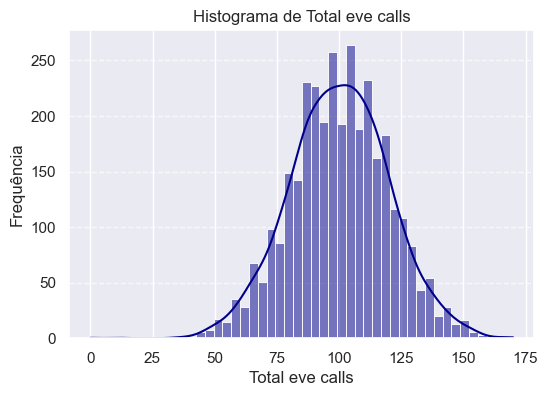

In [56]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total eve calls', kde=True, color='darkblue')

plt.title('Histograma de Total eve calls')
plt.xlabel('Total eve calls')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total eve charge

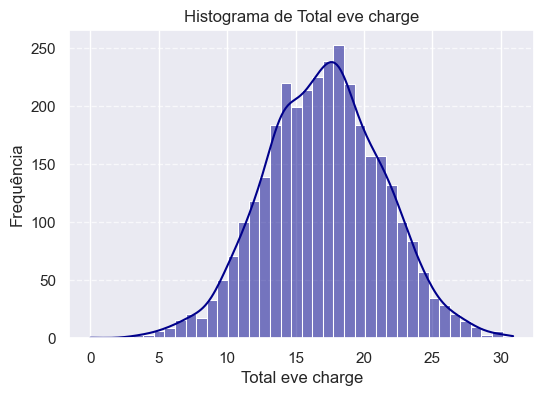

In [58]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total eve charge', kde=True, color='darkblue')

plt.title('Histograma de Total eve charge')
plt.xlabel('Total eve charge')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total night minutes

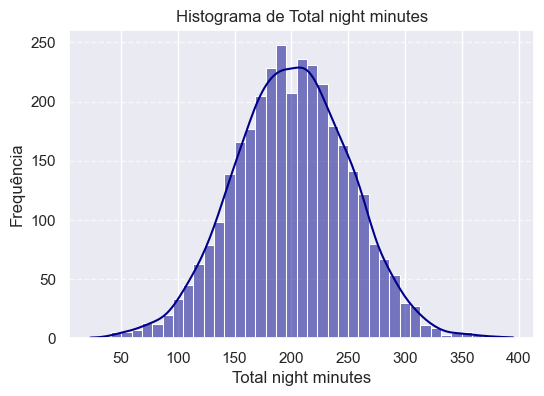

In [60]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total night minutes', kde=True, color='darkblue')

plt.title('Histograma de Total night minutes')
plt.xlabel('Total night minutes')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total night calls

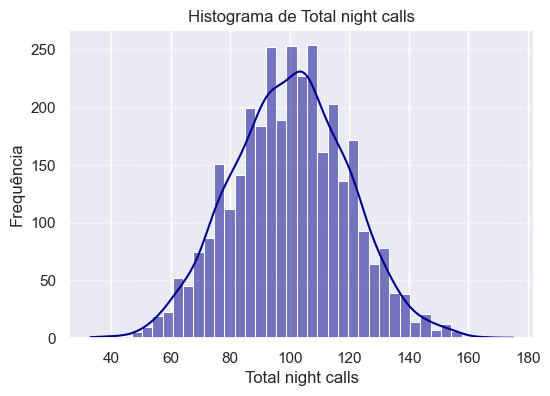

In [62]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total night calls', kde=True, color='darkblue')

plt.title('Histograma de Total night calls')
plt.xlabel('Total night calls')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total night charge

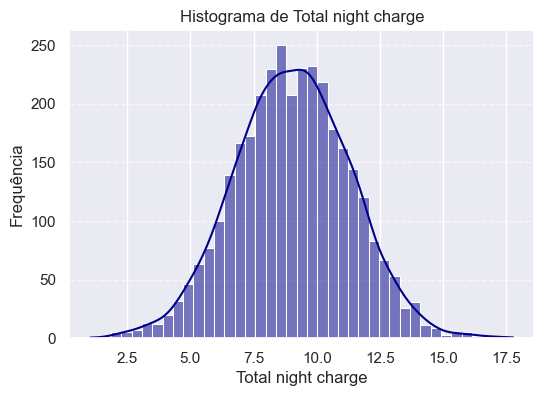

In [64]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total night charge', kde=True, color='darkblue')

plt.title('Histograma de Total night charge')
plt.xlabel('Total night charge')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total intl minutes

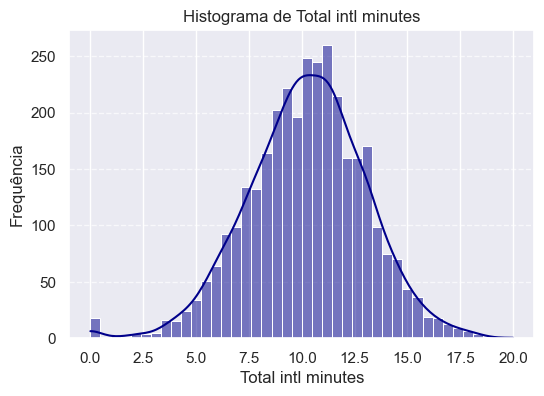

In [66]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total intl minutes', kde=True, color='darkblue')

plt.title('Histograma de Total intl minutes')
plt.xlabel('Total intl minutes')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total intl calls

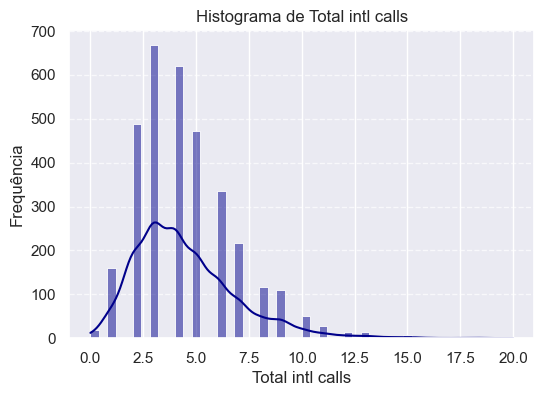

In [68]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total intl calls', kde=True, color='darkblue')

plt.title('Histograma de Total intl calls')
plt.xlabel('Total intl calls')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Total intl charge

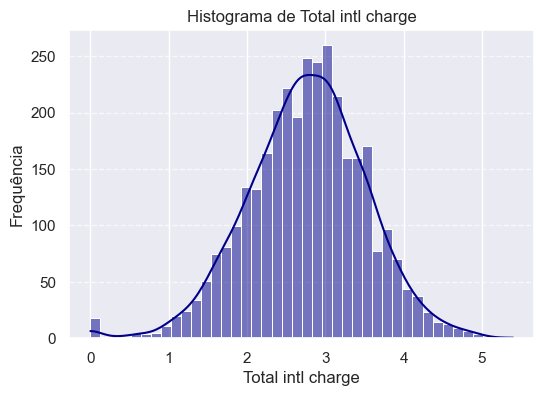

In [70]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Total intl charge', kde=True, color='darkblue')

plt.title('Histograma de Total intl charge')
plt.xlabel('Total intl charge')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

#### Histograma de Customer service calls

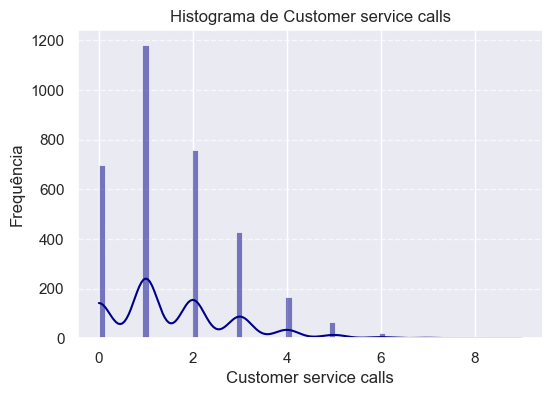

In [72]:
sns.set(rc={'figure.figsize':(6, 4)})

sns.histplot(data=df_completo, x='Customer service calls', kde=True, color='darkblue')

plt.title('Histograma de Customer service calls')
plt.xlabel('Customer service calls')  
plt.ylabel('Frequência')  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

- Nota-se que a maioria das variáveis numéricas do dataset apresentam Distribuição Normal ou próxima à Normal. Ou seja, a frequência dos dados é mais alta na média e diminui conforme nos afastamos dela.

Exceções:

- Number vmail messages: A grande maioria dos clientes não envia mensagens de correio de voz.

- Total intl calls: apresenta distribuição assimétrica positivamente. Ou seja, a maioria dos valores está concentrada na parte inferior da distribuição.

### Análise Univariada das Variáveis Categóricas

#### Gráfico de Barras com a participação de cada categoria da Variável State

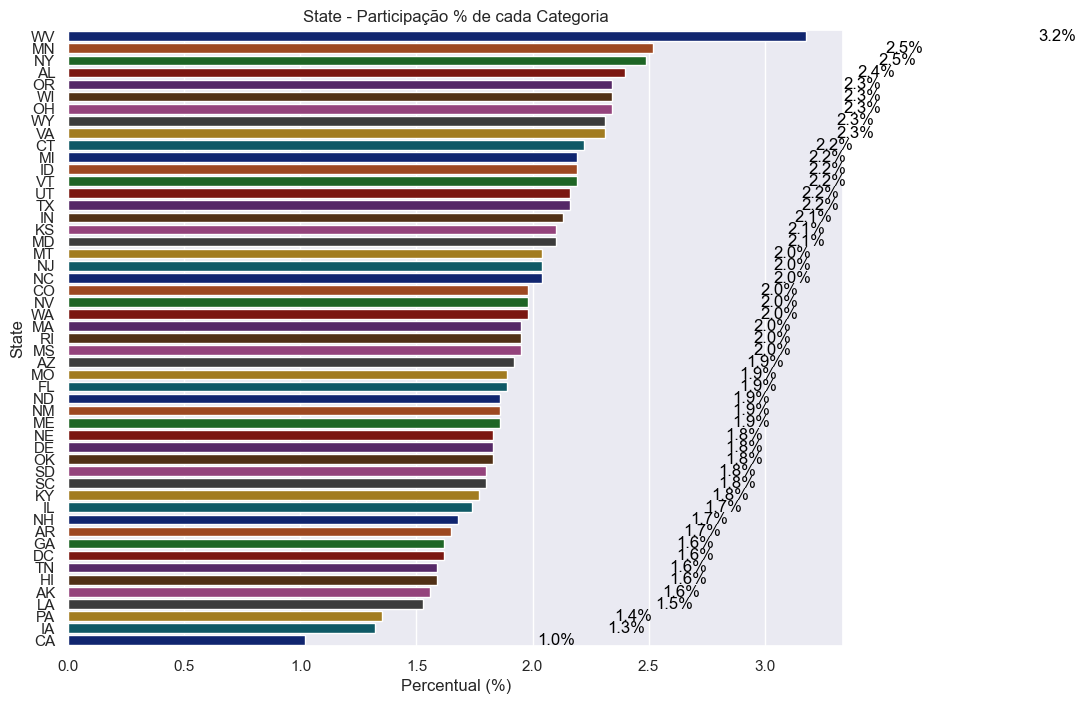

In [76]:
percentuais = df_completo['State'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 8))
sns.set(style='darkgrid') 

plot = sns.barplot(x=percentuais.values, y=percentuais.index, palette='dark', orient='h')

total = percentuais.sum()
for i, v in enumerate(percentuais):
    plot.text(v + 1, i, f'{v:.1f}%', va='center', ha='left', color='black')

plt.title('State - Participação % de cada Categoria') 
plt.xlabel('Percentual (%)') 
plt.ylabel('State') 

plt.show() 

#### Gráfico de Barras com a participação de cada categoria da Variável Area code

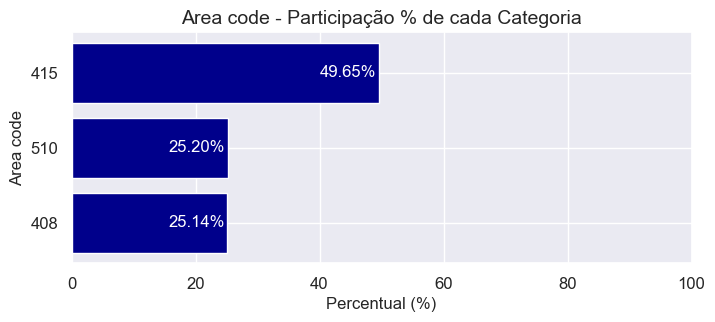

In [78]:
frequencias = df_completo['Area code'].value_counts()

percentuais = (frequencias / frequencias.sum()) * 100

percentuais = percentuais.sort_values(ascending=True)

plt.figure(figsize=(8, 3))
bars = plt.barh(percentuais.index.astype(str), percentuais, color='darkblue')

for bar, percentual in zip(bars, percentuais):
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, 
             f'{percentual:.2f}%', ha='center', va='center', fontsize=12, color='white')

plt.title('Area code - Participação % de cada Categoria', fontsize=14)
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Area code', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 100)

plt.show()

#### Gráfico de Barras com a participação de cada categoria da Variável International plan

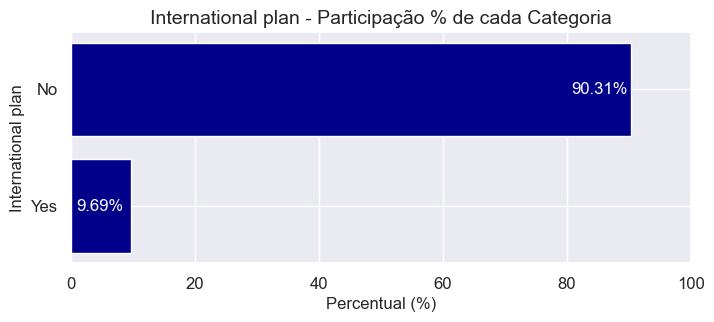

In [80]:
frequencias = df_completo['International plan'].value_counts()

percentuais = (frequencias / frequencias.sum()) * 100

percentuais = percentuais.sort_values(ascending=True)

plt.figure(figsize=(8, 3))
bars = plt.barh(percentuais.index.astype(str), percentuais, color='darkblue')

for bar, percentual in zip(bars, percentuais):
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, 
             f'{percentual:.2f}%', ha='center', va='center', fontsize=12, color='white')

plt.title('International plan - Participação % de cada Categoria', fontsize=14)
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('International plan', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 100)

plt.show()

#### Gráfico de Barras com a participação de cada categoria da Variável Voice mail plan

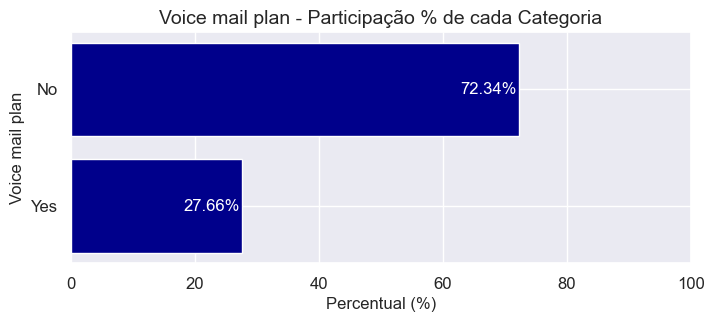

In [82]:
frequencias = df_completo['Voice mail plan'].value_counts()

percentuais = (frequencias / frequencias.sum()) * 100

percentuais = percentuais.sort_values(ascending=True)

plt.figure(figsize=(8, 3))
bars = plt.barh(percentuais.index.astype(str), percentuais, color='darkblue')

for bar, percentual in zip(bars, percentuais):
    plt.text(bar.get_width() - 5, bar.get_y() + bar.get_height() / 2, 
             f'{percentual:.2f}%', ha='center', va='center', fontsize=12, color='white')

plt.title('Voice mail plan - Participação % de cada Categoria', fontsize=14)
plt.xlabel('Percentual (%)', fontsize=12)
plt.ylabel('Voice mail plan', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 100)

plt.show()

- A maioria dos clientes da empresa está no Código de Área 415, não possui Plano Internacional e não possui Plano de Correio de Voz.

- Os clientes são bem distribuídos entre os estados dos Estados Unidos, mas há uma concentração um pouco maior nos estados de WV (West Virginia), MN (Minnesota) e NY (Nova York)

### Análise Multivariada

#### Matriz de Correlação

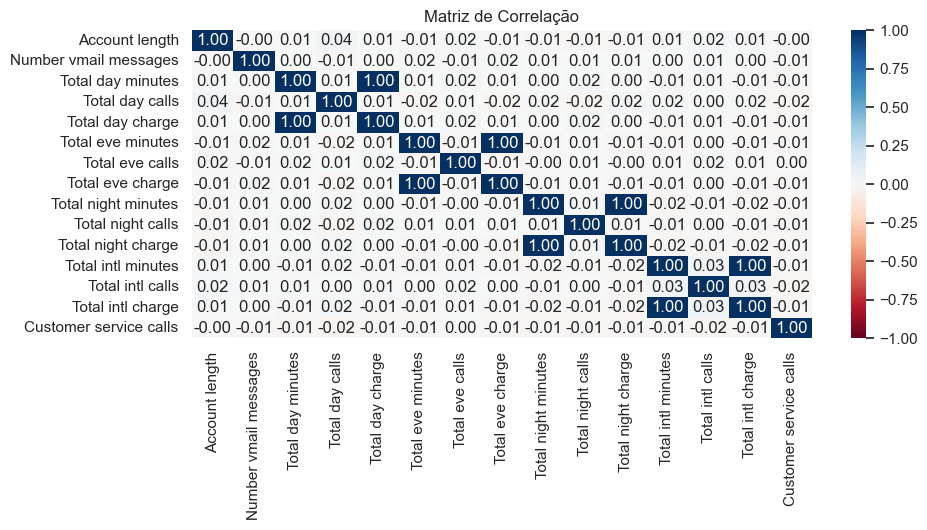

In [86]:
colunas_correlacionar = ['Account length', 'Number vmail messages', 'Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls', 'Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls']

correlation_matrix = df_completo[colunas_correlacionar ].corr()

sns.set(rc={'figure.figsize':(10, 4)}) 

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, fmt='.2f')

plt.title('Matriz de Correlação') 
plt.show()  

Ao analisar-se a Matriz de Correlação acima, nota-se que 4 pares de variáveis possuem correlação positiva perfeita:

- Total day minutes e Total day charge

- Total eve minutes e Total eve charge

- Total night minutes e Total night charge

- Total int minutes e Total int charge

Essas correlações fazem sentido, uma vez que quanto maior a quantidade de minutos em utilização, maior será a cobrança.

As demais variáveis numéricas apresentaram fraca correlação entre si.

### Análise de Associação das variáveis com a variável Binária "Inadimplência" - Information Value (IV)

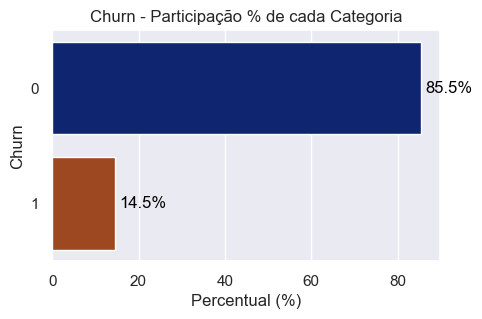

In [89]:
percentuais = df_completo['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
sns.set(style='darkgrid') 

plot = sns.barplot(x=percentuais.values, y=percentuais.index, palette='dark', orient='h')

total = percentuais.sum()
for i, v in enumerate(percentuais):
    plot.text(v + 1, i, f'{v:.1f}%', va='center', ha='left', color='black')

plt.title('Churn - Participação % de cada Categoria') 
plt.xlabel('Percentual (%)') 
plt.ylabel('Churn') 

plt.show() 

#### Função que calcula o Information Value (IV)

In [91]:
class analise_iv:
        
    def __get_tab_bivariada(self, var_escolhida):
     
        # Cria a contagem de Target_1 e Target_0
        df_aux = self.df.copy() 
        df_aux['target2'] = self.df[self.target]
        df2 = df_aux.pivot_table(values='target2',
                                 index=var_escolhida,
                                 columns=self.target,
                                 aggfunc='count')
        
        df2 = df2.rename(columns={0:'#Target_0',
                                  1:'#Target_1'})
        df2.fillna(0, inplace=True)

        # Cria as demais colunas da tabela bivariada
        df2['Total'] = (df2['#Target_0'] + df2['#Target_1'])
        df2['%Freq'] = (df2['Total'] / (df2['Total'].sum()) * 100).round(decimals=2)
        df2['%Target_1'] = (df2['#Target_1'] / (df2['#Target_1'].sum()) * 100).round(decimals=2)
        df2['%Target_0'] = (df2['#Target_0'] / (df2['#Target_0'].sum()) * 100).round(decimals=2)
        df2['%Target_0'] = df2['%Target_0'].apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['%Taxa_de_Target_1'] = (df2['#Target_1'] / df2['Total'] * 100).round(decimals=2)
        df2['Odds'] = (df2['%Target_1'] / df2['%Target_0']).round(decimals=2)
        df2['Odds'] = df2.Odds.apply(lambda x: 0.01 if x == 0 else x) #corrige problema do log indeterminado
        df2['LN(Odds)'] = np.log(df2['Odds']).round(decimals=2)
        df2['IV'] = (((df2['%Target_1'] / 100 - df2['%Target_0'] / 100) * df2['LN(Odds)'])).round(decimals=2)
        df2['IV'] = np.where(df2['Odds'] == 0.01, 0 , df2['IV']) 

        df2 = df2.reset_index()
        df2['Variavel'] = var_escolhida
        df2 = df2.rename(columns={var_escolhida: 'Var_Range'})
        df2 = df2[['Variavel','Var_Range', '#Target_1','#Target_0', 'Total', '%Freq', '%Target_1', '%Target_0',
       '%Taxa_de_Target_1', 'Odds', 'LN(Odds)', 'IV']]
        
        # Guarda uma cópia da tabela no histórico
        self.df_tabs_iv = pd.concat([self.df_tabs_iv, df2], axis = 0)
        
        return df2
        
    def get_bivariada(self, var_escolhida='all_vars'):
        
        if var_escolhida == 'all_vars':
                       
            #vars = self.df.drop(self.target,axis = 1).columns
            vars = self.get_lista_iv().index
            for var in vars:
                tabela = self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]
                print('==> "{}" tem IV de {}'.format(var,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var]['IV'].sum().round(decimals=2)))
                # printa a tabela no Jupyter
                display(tabela)
            
            return
        
        else:
            print('==> "{}" tem IV de {}'.format(var_escolhida,self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]['IV'].sum().round(decimals=2)))
            return self.df_tabs_iv[self.df_tabs_iv['Variavel'] == var_escolhida]
                   
            
    def get_lista_iv(self):
        
    
        # agrupa a lista de IV's em ordem descrescente
        lista = (self.df_tabs_iv.groupby('Variavel').agg({'IV':'sum'})).sort_values(by=['IV'],ascending=False)
            
        return lista
    
    

    def __init__(self, df, target, nbins=10):

        self.df = df.copy()
        self.target = target

        #lista de variaveis numericas
        df_num = self.df.loc[:,((self.df.dtypes == 'int32') | 
                                (self.df.dtypes == 'int64') | 
                                (self.df.dtypes == 'float64')
                               )
                            ]

        vars = df_num.drop(target,axis = 1).columns

        for var in vars:
            nome_var = 'fx_' + var 
            df_num[nome_var] = pd.qcut(df_num[var], 
                                       q=nbins, 
                                       precision=2,
                                       duplicates='drop')
            df_num = df_num.drop(var, axis = 1)
            df_num = df_num.rename(columns={nome_var: var})

        #lista de variaveis qualitativas
        df_str = self.df.loc[:,((self.df.dtypes == 'object') | 
                                (self.df.dtypes == 'category') |
                                (self.df.dtypes == 'bool'))]


        self.df = pd.concat([df_num,df_str],axis = 1)


         # inicializa tab historica
        self.df_tabs_iv = pd.DataFrame()

        vars = self.df.drop(self.target,axis = 1).columns
        for var in vars:
            self.__get_tab_bivariada(var);

        # remove tabs de iv duplicadas
        self.df_tabs_iv = self.df_tabs_iv.drop_duplicates(subset=['Variavel','Var_Range'], keep='last')

In [92]:
df_iv = analise_iv(df_completo,
                   'Churn',
                            nbins=5)

In [93]:
df_iv.get_bivariada(var_escolhida='Total day minutes')

==> "Total day minutes" tem IV de 0.55


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total day minutes,"(-0.01, 134.74]",88,579,667,20.01,18.22,20.32,13.19,0.90,-0.11,0.00
1,Total day minutes,"(134.74, 165.68]",69,597,666,19.98,14.29,20.95,10.36,0.68,-0.39,0.03
2,Total day minutes,"(165.68, 194.0]",52,616,668,20.04,10.77,21.61,7.78,0.50,-0.69,0.07
3,Total day minutes,"(194.0, 224.76]",47,618,665,19.95,9.73,21.68,7.07,0.45,-0.80,0.10
4,Total day minutes,"(224.76, 350.8]",227,440,667,20.01,47.00,15.44,34.03,3.04,1.11,0.35


- A variável **"Total day minutes" foi a que apresentou o maior Information Value (IV) em relação à variável binária "Churn"**. **O IV foi de 0,55** o que é considerado um forte poder de separação entre as variáveis. Assim, **o total de minutos utilizado por dia apresenta um forte poder de separação** para sabermos se o cliente tende a dar churn. Desta forma, ao analisar quantos minutos o cliente utiliza por dia, a empresa já terá uma boa estimativa se ele dará churn ou não.

- Como já apresentado em gráfico acima, a **Taxa de Churn geral da base de dados foi de 14,5%**. Notamos que **a faixa de 224,76 a 350,8 minutos da Variável "Total day minutes" apresentou uma Taxa Churn de 34,03%**, ficando acima da Taxa de Churn geral. 
  
- Uma análise similar pode ser obtida analisando-se a coluna Odds. **Quando o Odds de uma faixa da variável "Total day minutes" é maior que 1, é sinal que temos mais chance de aquela faixa apresentar churn do que de não apresentar churn**. A **faixa de 224,76 a 350,8 minuto**, por exemplo, foi responsável por 47% dos clientes que aprentaram churn e foi responsável por apenas 15,44% dos clientes que não apresentaram churn, resultando em um **Odds de 3,04** (47% / 15,44% = 3,04). Ou seja, a faixa de 224,76 a 350,8 minuto **possui mais chance de dar churn do que de não dar churn**.

- Assim, concentrar a atenção de políticas de marketing e comerciais para essa classe de clientes tem forte potencial de reduzir o Churn geral da empresa.

In [95]:
df_iv.get_bivariada(var_escolhida='Total day charge')

==> "Total day charge" tem IV de 0.55


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total day charge,"(-0.01, 22.91]",88,579,667,20.01,18.22,20.32,13.19,0.90,-0.11,0.00
1,Total day charge,"(22.91, 28.17]",69,597,666,19.98,14.29,20.95,10.36,0.68,-0.39,0.03
2,Total day charge,"(28.17, 32.98]",52,616,668,20.04,10.77,21.61,7.78,0.50,-0.69,0.07
3,Total day charge,"(32.98, 38.21]",47,618,665,19.95,9.73,21.68,7.07,0.45,-0.80,0.10
4,Total day charge,"(38.21, 59.64]",227,440,667,20.01,47.00,15.44,34.03,3.04,1.11,0.35


Como vimos na Matriz de Correlação, a variável "Total day minutes" apresenta uma correlação positiva perfeita com a variável "Total day charge". Assim, a análise IV das duas variáveis foi a mesma, assim como as conclusões desprendidas.

In [97]:
df_iv.get_bivariada(var_escolhida='Customer service calls')

==> "Customer service calls" tem IV de 0.52


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Customer service calls,"(-0.01, 1.0]",214,1664,1878,56.35,44.31,58.39,11.40,0.76,-0.27,0.04
1,Customer service calls,"(1.0, 2.0]",87,672,759,22.77,18.01,23.58,11.46,0.76,-0.27,0.02
2,Customer service calls,"(2.0, 3.0]",44,385,429,12.87,9.11,13.51,10.26,0.67,-0.40,0.02
3,Customer service calls,"(3.0, 9.0]",138,129,267,8.01,28.57,4.53,51.69,6.31,1.84,0.44


- Outra variável que apresentou **alto Information Value (IV)** em relação à variável binária "Churn" foi a variável **Customer service calls**. **O IV foi de 0,52** o que é também considerado um forte poder de separação entre as variáveis. Assim, **a quantidade de vezes que um cliente entrou em contato com o serviço de atendimento ao cliente apresenta um forte poder de separação** para sabermos se o cliente tende a dar churn. Desta forma, ao analisar quantas vezes o cliente entrou em contato com o seviço de atendimento, a empresa já terá uma boa estimativa se ele dará churn ou não.

- Como já apresentado em gráfico acima, a **Taxa de Churn geral da base de dados foi de 14,5%**. Notamos que **a faixa de 3 a 9 ligações da Variável "Customer service calls" apresentou uma Taxa de Churn de 51,69%**, ficando acima da Taxa de Churn geral. 
  
- Uma análise similar pode ser obtida analisando-se a coluna Odds. **Quando o Odds de uma faixa da variável "Customer service calls" é maior que 1, é sinal que temos mais chance de aquela faixa apresentar churn do que de não apresentar churn**. A **faixa de 3 a 9 ligações**, por exemplo, foi responsável por 28,57% dos clientes que aprentaram churn e foi responsável por apenas 4,53% dos clientes que não apresentaram churn, resultando em um **Odds de 6,31** (28,57% / 4,53% = 6,34). Ou seja, a faixa de faixa de 3 a 9 ligações **possui mais chance de dar churn do que de não dar churn**.

- Assim, concentrar a atenção de políticas de marketing e comerciais para essa classe de clientes tem forte potencial de reduzir o Churn geral da empresa.

In [99]:
df_iv.get_bivariada(var_escolhida='International plan')

==> "International plan" tem IV de 0.38


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,International plan,No,346,2664,3010,90.31,71.64,93.47,11.50,0.77,-0.26,0.06
1,International plan,Yes,137,186,323,9.69,28.36,6.53,42.41,4.34,1.47,0.32


- Outra variável que apresentou **alto Information Value (IV)** em relação à variável binária "Churn" foi a variável **International plan**. **O IV foi de 0,38** o que é também considerado um forte poder de separação entre as variáveis. Assim, **o cliente possuir tarifas específicas para chamadas internacionais apresenta um forte poder de separação** para sabermos se o cliente tende a dar churn. Desta forma, ao analisar se o cliente possui Plano Internacional, a empresa já terá uma boa estimativa se ele dará churn ou não.

- Como já apresentado em gráfico acima, a **Taxa de Churn geral da base de dados foi de 14,5%**. Notamos que **categoria de clientes que apresentava Plano Internacional apresentou uma Taxa de Churn de 42,41%**, ficando acima da Taxa de Churn geral. 
  
- Uma análise similar pode ser obtida analisando-se a coluna Odds. **Quando o Odds de uma categoria da variável "International plan" é maior que 1, é sinal que temos mais chance de aquela categoria apresentar churn do que de não apresentar churn**. A **categoria dos clientes que apresentavam Plano Internacional** foi responsável por 28,36% dos clientes que aprentaram churn e foi responsável por apenas 6,53% dos clientes que não apresentaram churn, resultando em um **Odds de 4,34** (28,57% / 6,53% = 4,34). Ou seja, categoria de clientes com Plano Internacional **possui mais chance de dar churn do que de não dar churn**.

- Assim, concentrar a atenção de políticas de marketing e comerciais para essa classe de clientes tem forte potencial de reduzir o Churn geral da empresa.

In [101]:
df_iv.get_bivariada(var_escolhida='State')

==> "State" tem IV de 0.17


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,State,AK,3,49,52,1.56,0.62,1.72,5.77,0.36,-1.02,0.01
1,State,AL,8,72,80,2.40,1.66,2.53,10.00,0.66,-0.42,0.00
2,State,AR,11,44,55,1.65,2.28,1.54,20.00,1.48,0.39,0.00
3,State,AZ,4,60,64,1.92,0.83,2.11,6.25,0.39,-0.94,0.01
4,State,CA,9,25,34,1.02,1.86,0.88,26.47,2.11,0.75,0.01
5,State,CO,9,57,66,1.98,1.86,2.00,13.64,0.93,-0.07,0.00
6,State,CT,12,62,74,2.22,2.48,2.18,16.22,1.14,0.13,0.00
7,State,DC,5,49,54,1.62,1.04,1.72,9.26,0.60,-0.51,0.00
8,State,DE,9,52,61,1.83,1.86,1.82,14.75,1.02,0.02,0.00
9,State,FL,8,55,63,1.89,1.66,1.93,12.70,0.86,-0.15,0.00


- A variável 'State' apresentou um **IV de 0,17** em relação à variável binária "Churn" foi a variável **International plan**, o que é considerado um médito poder de separação entre as variáveis. 

- Como já apresentado em gráfico acima, a **Taxa de Churn geral da base de dados foi de 14,5%**. Alguns estados apresentaram Taxa de Churn acima da média, especialmente os estados de CA (Califórnia) e NJ (Nova Jersey) que **apresentaram Taxa de Churn de 26,47%**. Assim, é importante traçar políticas específicas para o recorte de público desses estados.

In [103]:
df_iv.get_bivariada(var_escolhida='Account length')

==> "Account length" tem IV de 0.0


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Account length,"(0.99, 67.0]",88,588,676,20.28,18.22,20.63,13.02,0.88,-0.13,0.0
1,Account length,"(67.0, 91.0]",93,591,684,20.52,19.25,20.74,13.60,0.93,-0.07,0.0
2,Account length,"(91.0, 111.0]",105,548,653,19.59,21.74,19.23,16.08,1.13,0.12,0.0
3,Account length,"(111.0, 134.0]",104,558,662,19.86,21.53,19.58,15.71,1.10,0.10,0.0
4,Account length,"(134.0, 243.0]",93,565,658,19.74,19.25,19.82,14.13,0.97,-0.03,0.0


In [104]:
df_iv.get_bivariada(var_escolhida='Area code')

==> "Area code" tem IV de 0.0


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Area code,"(407.99, 415.0]",358,2135,2493,74.8,74.12,74.91,14.36,0.99,-0.01,0.0
1,Area code,"(415.0, 510.0]",125,715,840,25.2,25.88,25.09,14.88,1.03,0.03,0.0


In [105]:
df_iv.get_bivariada(var_escolhida='Voice mail plan')

==> "Voice mail plan" tem IV de 0.1


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Voice mail plan,No,403,2008,2411,72.34,83.44,70.46,16.72,1.18,0.17,0.02
1,Voice mail plan,Yes,80,842,922,27.66,16.56,29.54,8.68,0.56,-0.58,0.08


In [106]:
df_iv.get_bivariada(var_escolhida='Number vmail messages')

==> "Number vmail messages" tem IV de 0.02


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Number vmail messages,"(-0.01, 25.0]",416,2279,2695,80.86,86.13,79.96,15.44,1.08,0.08,0.00
1,Number vmail messages,"(25.0, 51.0]",67,571,638,19.14,13.87,20.04,10.50,0.69,-0.37,0.02


In [107]:
df_iv.get_bivariada(var_escolhida='Total day calls')

==> "Total day calls" tem IV de 0.01


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total day calls,"(-0.01, 84.0]",100,599,699,20.97,20.70,21.02,14.31,0.98,-0.02,0.00
1,Total day calls,"(84.0, 96.0]",91,604,695,20.85,18.84,21.19,13.09,0.89,-0.12,0.00
2,Total day calls,"(96.0, 106.0]",93,569,662,19.86,19.25,19.96,14.05,0.96,-0.04,0.00
3,Total day calls,"(106.0, 117.0]",85,543,628,18.84,17.60,19.05,13.54,0.92,-0.08,0.00
4,Total day calls,"(117.0, 165.0]",114,535,649,19.47,23.60,18.77,17.57,1.26,0.23,0.01


In [108]:
df_iv.get_bivariada(var_escolhida='Total eve minutes')

==> "Total eve minutes" tem IV de 0.07


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total eve minutes,"(-0.01, 158.94]",66,601,667,20.01,13.66,21.09,9.90,0.65,-0.43,0.03
1,Total eve minutes,"(158.94, 188.0]",95,572,667,20.01,19.67,20.07,14.24,0.98,-0.02,0.00
2,Total eve minutes,"(188.0, 213.44]",87,579,666,19.98,18.01,20.32,13.06,0.89,-0.12,0.00
3,Total eve minutes,"(213.44, 244.4]",97,570,667,20.01,20.08,20.00,14.54,1.00,0.00,0.00
4,Total eve minutes,"(244.4, 363.7]",138,528,666,19.98,28.57,18.53,20.72,1.54,0.43,0.04


In [109]:
df_iv.get_bivariada(var_escolhida='Total eve calls')

==> "Total eve calls" tem IV de 0.0


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total eve calls,"(-0.01, 84.0]",99,608,707,21.21,20.50,21.33,14.00,0.96,-0.04,0.0
1,Total eve calls,"(84.0, 95.0]",94,559,653,19.59,19.46,19.61,14.40,0.99,-0.01,0.0
2,Total eve calls,"(95.0, 105.0]",92,563,655,19.65,19.05,19.75,14.05,0.96,-0.04,0.0
3,Total eve calls,"(105.0, 117.0]",106,591,697,20.91,21.95,20.74,15.21,1.06,0.06,0.0
4,Total eve calls,"(117.0, 170.0]",92,529,621,18.63,19.05,18.56,14.81,1.03,0.03,0.0


In [110]:
df_iv.get_bivariada(var_escolhida='Total eve charge')

==> "Total eve charge" tem IV de 0.07


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total eve charge,"(-0.01, 13.51]",66,601,667,20.01,13.66,21.09,9.90,0.65,-0.43,0.03
1,Total eve charge,"(13.51, 15.98]",95,572,667,20.01,19.67,20.07,14.24,0.98,-0.02,0.00
2,Total eve charge,"(15.98, 18.14]",87,579,666,19.98,18.01,20.32,13.06,0.89,-0.12,0.00
3,Total eve charge,"(18.14, 20.77]",97,570,667,20.01,20.08,20.00,14.54,1.00,0.00,0.00
4,Total eve charge,"(20.77, 30.91]",138,528,666,19.98,28.57,18.53,20.72,1.54,0.43,0.04


In [111]:
df_iv.get_bivariada(var_escolhida='Total night minutes')

==> "Total night minutes" tem IV de 0.01


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total night minutes,"(23.189999999999998, 158.6]",77,592,669,20.07,15.94,20.77,11.51,0.77,-0.26,0.01
1,Total night minutes,"(158.6, 188.2]",102,566,668,20.04,21.12,19.86,15.27,1.06,0.06,0.00
2,Total night minutes,"(188.2, 214.0]",99,565,664,19.92,20.50,19.82,14.91,1.03,0.03,0.00
3,Total night minutes,"(214.0, 243.9]",100,566,666,19.98,20.70,19.86,15.02,1.04,0.04,0.00
4,Total night minutes,"(243.9, 395.0]",105,561,666,19.98,21.74,19.68,15.77,1.10,0.10,0.00


In [112]:
df_iv.get_bivariada(var_escolhida='Total night calls')

==> "Total night calls" tem IV de 0.01


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total night calls,"(32.99, 83.0]",107,580,687,20.61,22.15,20.35,15.57,1.09,0.09,0.00
1,Total night calls,"(83.0, 95.0]",91,584,675,20.25,18.84,20.49,13.48,0.92,-0.08,0.00
2,Total night calls,"(95.0, 105.0]",89,580,669,20.07,18.43,20.35,13.30,0.91,-0.09,0.00
3,Total night calls,"(105.0, 117.0]",90,575,665,19.95,18.63,20.18,13.53,0.92,-0.08,0.00
4,Total night calls,"(117.0, 175.0]",106,531,637,19.11,21.95,18.63,16.64,1.18,0.17,0.01


In [113]:
df_iv.get_bivariada(var_escolhida='Total night charge')

==> "Total night charge" tem IV de 0.01


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total night charge,"(1.03, 7.14]",78,596,674,20.22,16.15,20.91,11.57,0.77,-0.26,0.01
1,Total night charge,"(7.14, 8.47]",101,568,669,20.07,20.91,19.93,15.10,1.05,0.05,0.00
2,Total night charge,"(8.47, 9.63]",99,562,661,19.83,20.50,19.72,14.98,1.04,0.04,0.00
3,Total night charge,"(9.63, 10.98]",101,566,667,20.01,20.91,19.86,15.14,1.05,0.05,0.00
4,Total night charge,"(10.98, 17.77]",104,558,662,19.86,21.53,19.58,15.71,1.10,0.10,0.00


In [114]:
df_iv.get_bivariada(var_escolhida='Total intl minutes')

==> "Total intl minutes" tem IV de 0.04


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total intl minutes,"(-0.01, 8.0]",79,616,695,20.85,16.36,21.61,11.37,0.76,-0.27,0.01
1,Total intl minutes,"(8.0, 9.7]",104,578,682,20.46,21.53,20.28,15.25,1.06,0.06,0.00
2,Total intl minutes,"(9.7, 11.0]",88,559,647,19.41,18.22,19.61,13.60,0.93,-0.07,0.00
3,Total intl minutes,"(11.0, 12.5]",82,565,647,19.41,16.98,19.82,12.67,0.86,-0.15,0.00
4,Total intl minutes,"(12.5, 20.0]",130,532,662,19.86,26.92,18.67,19.64,1.44,0.36,0.03


In [115]:
df_iv.get_bivariada(var_escolhida='Total intl calls')

==> "Total intl calls" tem IV de 0.06


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total intl calls,"(-0.01, 2.4]",139,528,667,20.01,28.78,18.53,20.84,1.55,0.44,0.05
1,Total intl calls,"(2.4, 3.0]",98,570,668,20.04,20.29,20.00,14.67,1.01,0.01,0.00
2,Total intl calls,"(3.0, 5.0]",132,959,1091,32.73,27.33,33.65,12.10,0.81,-0.21,0.01
3,Total intl calls,"(5.0, 6.0]",43,293,336,10.08,8.90,10.28,12.80,0.87,-0.14,0.00
4,Total intl calls,"(6.0, 20.0]",71,500,571,17.13,14.70,17.54,12.43,0.84,-0.17,0.00


In [116]:
df_iv.get_bivariada(var_escolhida='Total intl charge')

==> "Total intl charge" tem IV de 0.04


Churn,Variavel,Var_Range,#Target_1,#Target_0,Total,%Freq,%Target_1,%Target_0,%Taxa_de_Target_1,Odds,LN(Odds),IV
0,Total intl charge,"(-0.01, 2.16]",79,616,695,20.85,16.36,21.61,11.37,0.76,-0.27,0.01
1,Total intl charge,"(2.16, 2.62]",104,578,682,20.46,21.53,20.28,15.25,1.06,0.06,0.00
2,Total intl charge,"(2.62, 2.97]",88,559,647,19.41,18.22,19.61,13.60,0.93,-0.07,0.00
3,Total intl charge,"(2.97, 3.38]",82,565,647,19.41,16.98,19.82,12.67,0.86,-0.15,0.00
4,Total intl charge,"(3.38, 5.4]",130,532,662,19.86,26.92,18.67,19.64,1.44,0.36,0.03


Afora as variáveis 'Total day minutes', 'Total day charge', 'Customer service calls', 'International plan' e 'State', **as demais variáveis apresentaram baixos Information Value (IV) em relação à variável binária 'Churn', ou seja, apresentaram fraco poder de separação com a variável 'Churn'.**

### Desenvolvimento do Modelo

### Definição do *Target* e das *Features*

Uma vez que há uma base de dados específica para o treinamento dos modelos ('churn-80.csv') e uma base de dados específica para os testes ('churn-20.csv'), não usaremos a função train_test_split, da biblioteca scikit-learn, para separar a base de dados total em treino em teste.

In [121]:
# Target (variável resposta) da base de treino

y_train = df_treino['Churn']
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int32

In [122]:
# Features (variáveis explicativas) da base de treino
x_var = [
    'State', 'Account length','Area code','International plan','Voice mail plan','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls'
]
x_train = pd.get_dummies(df_treino[x_var], drop_first=True)

In [123]:
x_train.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


In [124]:
# Target (variável resposta) da base de teste

y_test = df_teste['Churn']
y_test.head()

0    0
1    1
2    1
3    0
4    0
Name: Churn, dtype: int32

In [125]:
# Features (variáveis explicativas) da base de teste
x_var_teste = [
    'State', 'Account length','Area code','International plan','Voice mail plan','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls'
]
x_test = pd.get_dummies(df_teste[x_var_teste], drop_first=True)

In [126]:
x_test.head()
x_test.to_excel('x_test.xlsx', index=False)

### Balanceamento das Classes

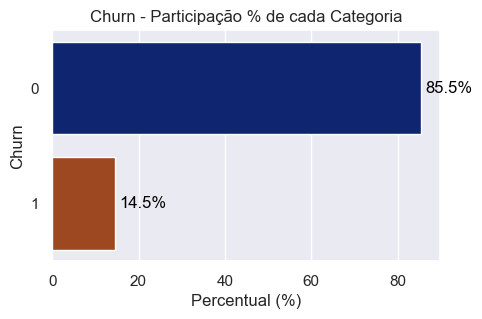

In [128]:
percentuais = df_completo['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(5, 3))
sns.set(style='darkgrid') 

plot = sns.barplot(x=percentuais.values, y=percentuais.index, palette='dark', orient='h')

total = percentuais.sum()
for i, v in enumerate(percentuais):
    plot.text(v + 1, i, f'{v:.1f}%', va='center', ha='left', color='black')

plt.title('Churn - Participação % de cada Categoria') 
plt.xlabel('Percentual (%)') 
plt.ylabel('Churn') 

plt.show()

Como podemos verificar acima, 85,5% das observações da coluna Churn são do tipo 0 (Clientes que não deram churn).

Ou seja, **essa base é desbalanceada. Para bases desbalanceadas, a Acurácia não é uma métrica de desempenho muito boa** porque, neste tipo de base, a maioria das instâncias pertence a uma classe majoritária, enquanto uma minoria pertence a uma classe minoritária. Então, se um modelo simplesmente predizer a classe majoritária para todas as instâncias, ele ainda pode obter uma alta Acurácia. Isso ocorre porque a maioria das previsões estará correta apenas devido à predominância da classe majoritária, ignorando completamente a classe minoritária. 

Ex: uma base de dados com 1000 instâncias, das quais 950 pertencem à classe majoritária (classe 0) e 50 pertencem à classe minoritária (classe 1).
Um modelo que prediz sempre a classe 0 terá uma acurácia de 95% (950/1000), mesmo que ele nunca consiga prever corretamente a classe 1.
Essa acurácia de 95% pode parecer muito boa à primeira vista, mas o modelo não tem utilidade prática porque falha completamente em identificar a classe minoritária.

Na base em questão, se montarmos um modelo de classificação que estima todas as instâncias como sendo do tipo 0, já teríamos uma Acurácia de 85,5%. Então, iremos olhar com mais ênfase as outras métricas de desempenho

### Função que retorna as Métricas de Desempenho em um DataFrame

In [131]:
# Função para cálculo do desempenho de modelos
def calcula_desempenho(modelo, x_train, y_train, x_test, y_test):
    
    # Cálculo dos valores preditos
    ypred_train = modelo.predict(x_train)
    ypred_proba_train = modelo.predict_proba(x_train)[:,1]

    ypred_test = modelo.predict(x_test)
    ypred_proba_test = modelo.predict_proba(x_test)[:,1]

    # Métricas de Desempenho
    acc_train = accuracy_score(y_train, ypred_train)
    acc_test = accuracy_score(y_test, ypred_test)
    
    roc_train = roc_auc_score(y_train, ypred_proba_train)
    roc_test = roc_auc_score(y_test, ypred_proba_test)
          
    prec_train = precision_score(y_train, ypred_train, zero_division=0)
    prec_test = precision_score(y_test, ypred_test, zero_division=0)
    
    recl_train = recall_score(y_train, ypred_train)
    recl_test = recall_score(y_test, ypred_test)
    
    f1_train = f1_score(y_train, ypred_train)
    f1_test = f1_score(y_test, ypred_test)

    df_desemp = pd.DataFrame({'Treino':[acc_train, roc_train, 
                                        prec_train, recl_train, f1_train],
                              'Teste':[acc_test, roc_test,
                                       prec_test, recl_test, f1_test]},
                            index=['Acurácia','AUROC',
                                   'Precision','Recall','F1'])
    
    df_desemp['Variação%'] = round(df_desemp['Teste'] / df_desemp['Treino'] - 1, 2)*100
    
    return df_desemp

### Criando o nosso Modelo Base-Line:

### Modelo individual: Regressão Logística

In [134]:
# Definição do modelo
modelo_rl = LogisticRegression(max_iter=1000)

# Ajuste do Modelo
modelo_rl.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [135]:
desemp_rl=calcula_desempenho(modelo_rl, x_train, y_train, x_test, y_test)

desemp_rl

,Treino,Teste,Variação%
Acurácia,0.867592,0.847076,-2.0
AUROC,0.832556,0.794590,-5.0
Precision,0.596685,0.414634,-31.0
Recall,0.278351,0.178947,-36.0
F1,0.379613,0.250000,-34.0


### Interpretação de Métricas de Performance

Uma das principais Métricas de Performance em modelos de classificação é o **Recall (ou Sensibilidade)**. Ela é calculada dividindo-se os Verdadeiros Positivos (TP) pela soma de Verdadeiros Positivos (TP) e Falsos Negativos (FN), conforme fórmula abaixo.

<img src="https://uploaddeimagens.com.br/images/004/816/815/full/Recall.jpg">


Ou seja, **de todas as classificações que, de fato, foram positivas, quantas o meu modelo previu que seriam positivas**. Dito de outra forma, o Recall mostra a proporção de casos positivos reais que o modelo conseguiu identificar corretamente. É crítico quando é essencial capturar o máximo de casos positivos.

No caso desta base de dados, um **Recall de 30%, por exemplo**, nos informa que **de cada 100 clientes que realmente cancelaram o serviço, o modelo preveria que 30 cancelariam o serviço**. Nesse cenário, a empresa **identificaria corretamente 30 clientes que iriam cancelar** (e iria propor alguma condição especial para mantê-los como clientes), mas **deixaria de identificar corretamente 70 clientes que provavelmente cancelariam o serviço**.

Quanto maior for essa métrica, melhor. No caso desta base de dados, quanto maior o Recall, **maior será a assertividade do modelo em identificar clientes que provavelmente cancelarão o serviço**, possibilitando que a empresa tome medidas **preventivas** para reter esses clientes, **reduzindo o risco de perda de receita**.

Outra Métrica de Performance muito importante de Modelos de Classificação é o **Precision**. Ela é calculada dividindo-se os Verdadeiros Positivos (TP) pela soma de Verdadeiros Positivos (TP) e Falsos Positivos (FP), conforme fórmula abaixo.

<img src="https://uploaddeimagens.com.br/images/004/816/842/full/Precision.jpg">

Ou seja, **de todas as classificações que o meu modelo previu que seriam positivas, quantas de fato foram positivas**. Dito de outra forma, o Precision calcula a proporção de previsões positivas que foram corretas. É especialmente importante quando o custo de um Falso Positivo é alto.

No caso desta base de dados, um **Precision de 60%, por exemplo**, nos informa que **de cada 100 clientes que o modelo previu que cancelariam o serviço, 60 cancelaram o serviço, de fato**. Nesse cenário, a cada 100 clientes, **40 (100-60) clientes são erroneamente identificados como prováveis canceladores**. A empresa, ao tratar esses 40 clientes como se estivessem prestes a cancelar, **poderá gastar recursos e esforços de maneira desnecessária, o que representa um custo de oportunidade**.

Quanto maior for essa métrica, melhor. No caso desta base de dados, quanto maior o Precision, **mais eficaz o modelo será em identificar corretamente os clientes que realmente vão cancelar o serviço**. Isso permite que a empresa **tome decisões mais assertivas e direcionadas para reter clientes**, evitando a aplicação de recursos em clientes que não estavam realmente em risco de cancelamento

#### Curva ROC do Moodelo de Regressão Logística

In [140]:
# Cálculo dos valores preditos para plotarmos a curva ROC abaixo
ypred_train = modelo_rl.predict(x_train)
ypred_proba_train = modelo_rl.predict_proba(x_train)[:,1]

ypred_test = modelo_rl.predict(x_test)
ypred_proba_test = modelo_rl.predict_proba(x_test)[:,1]


# Calculando a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_test)
roc_auc = auc(fpr, tpr)

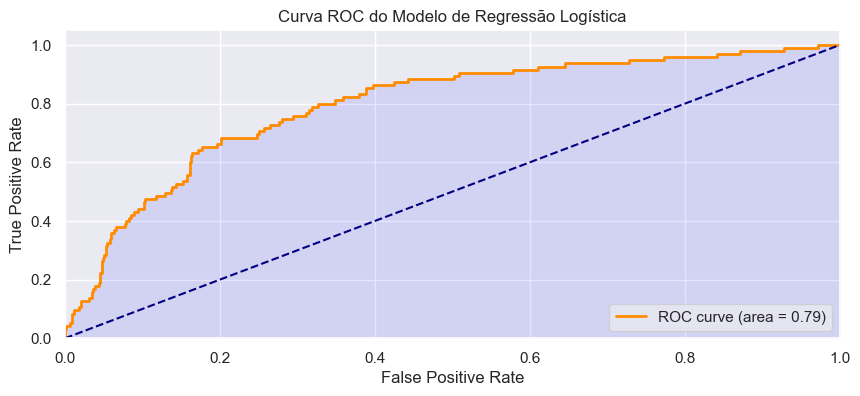

In [141]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC do Modelo de Regressão Logística')
plt.legend(loc='lower right')
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.grid(True)

- No gráfico acima, nós temos **no Eixo Y** o **True Positive Rate (TPR)** que nada mais é que a métrica de desempenho **Recall**. Ou seja, de todas as classificações que, de fato, foram positivas, quantas o modelo previu que seriam positivas.
  
- No **Eixo X** nós temos a **False Positive Rate**. Ela é calculada como 1 - True Negative Rate (TNR). A TNR é a divisão dos Verdadeiros Negativos (TN) pela soma dos Verdadeiros Negativos (TN) com os Falsos Positivos (FP). Ou seja, a True Negative Rate nos retorna de todas as classificações que, de fato, foram negativas, quantas o modelo previu que seriam negativas.
  
- Um modelo de classificação perfeito teria 100% de True Positive Rate (TPR) e 100% de True Negative Rate (TNR). Ou seja, esse modelo perfeito não apresentaria Falsos Positivos e nem Falsos Negativos.
  
- Por isso que o Eixo X do gráfico acima é 1 - True Negative Rate (TNR). Porque iremos calcular a área desse gráfico para obtermos uma medida de performance do modelo. Assim, quanto mais próxima à diagonal superior esquerda do gráfico, maior será a área abaixo da curva. Essa será a área de um modelo perfeito, em que a True Positive Rate (no Eixo Y) será de 100% e 1 - True Negative Rate (TNR) será de 0% (no Eixo X), já que, nesse modelo perfeito, a TNR será de 100%.
  
- A curva laranja do gráfico acima é conhecida como Curva ROC (Receiver Operating Characteristic Curve. Em português, Curva Característica de Operação do Receptor). E a área abaixo dessa curva é conhecida como AUC, ou AUROC (Area Under Curve. Ou seja, área abaixo da curva ROC). Quanto maior for o indicador AUC, maior será a capacidade do modelo de identificar Verdadeiros Positivos e Verdadeiros Negativos e menores serão os Falsos Positivos e 

### Módelo Individual - Árvore de Decisão (Decision Tree)

In [413]:
# Definição do modelo
modelo_dt = DecisionTreeClassifier(min_samples_leaf=2,
                                     max_depth=3,
                                     random_state=42)

In [415]:
# Ajuste do Modelo
modelo_dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

In [417]:
desemp_dt=calcula_desempenho(modelo_dt, x_train, y_train, x_test, y_test)

desemp_dt

,Treino,Teste,Variação%
Acurácia,0.902476,0.919040,2.0
AUROC,0.833540,0.833732,0.0
Precision,0.847826,0.859649,1.0
Recall,0.402062,0.515789,28.0
F1,0.545455,0.644737,18.0


### Ensemble: *Bagging de Regressão Logística*

In [148]:
# Inicia o estimador base para o Bagging
modelo_base = LogisticRegression(max_iter=1000)

In [149]:
num_estimadores = 100

In [150]:
# Classificador de Bagging

modelo_bagging = BaggingClassifier(estimator = modelo_base, 
                                   n_estimators = num_estimadores, 
                                   max_samples=0.5,
                                   max_features=0.5,
                                   random_state = 42, 
                                   n_jobs=-1) 

In [151]:
# Ajuste do Modelo
modelo_bagging.fit(x_train,y_train)

BaggingClassifier(estimator=LogisticRegression(max_iter=1000), max_features=0.5,
                  max_samples=0.5, n_estimators=100, n_jobs=-1,
                  random_state=42)

In [152]:
desemp_bagging=calcula_desempenho(modelo_bagging, x_train, y_train, x_test, y_test)

desemp_bagging

,Treino,Teste,Variação%
Acurácia,0.859715,0.859070,-0.0
AUROC,0.834740,0.827162,-1.0
Precision,1.000000,1.000000,0.0
Recall,0.036082,0.010526,-71.0
F1,0.069652,0.020833,-70.0


### Ensemble: *Bagging Random Forest*

In [154]:
modelo_rf = RandomForestClassifier(n_estimators=100, 
                                   min_samples_leaf=2, 
                                   max_depth=5,
                                   random_state = 42)

In [155]:
modelo_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, random_state=42)

In [156]:
desemp_rf = calcula_desempenho(modelo_rf, x_train, y_train, x_test, y_test)

desemp_rf

,Treino,Teste,Variação%
Acurácia,0.890473,0.899550,1.0
AUROC,0.934479,0.908723,-3.0
Precision,1.000000,0.937500,-6.0
Recall,0.247423,0.315789,28.0
F1,0.396694,0.472441,19.0


### Ensemble: *Boosting* - **AdaBoost**

In [158]:
modelo_ada = AdaBoostClassifier(n_estimators=50,
                                learning_rate = 0.6,
                                random_state = 42)

In [159]:
# Ajuste do Modelo
modelo_ada.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.6, random_state=42)

In [160]:
desemp_ada = calcula_desempenho(modelo_ada,
                                x_train, y_train,x_test, y_test)
desemp_ada

,Treino,Teste,Variação%
Acurácia,0.883721,0.883058,-0.0
AUROC,0.910857,0.866829,-5.0
Precision,0.693069,0.649123,-6.0
Recall,0.360825,0.389474,8.0
F1,0.474576,0.486842,3.0


### Ensemble: *Boosting* - **Gradient Boosting**

In [162]:
modelo_gb = GradientBoostingClassifier(n_estimators=100,
                                       learning_rate = 0.4,
                                       subsample=0.2,
                                       min_samples_leaf=5,
                                       max_depth=3,
                                       random_state = 42)

In [163]:
# Ajuste do modelo
modelo_gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.4, min_samples_leaf=5,
                           random_state=42, subsample=0.2)

In [164]:
# Métricas de Desempenho
desemp_gb = calcula_desempenho(modelo_gb, x_train, y_train, x_test, y_test)
desemp_gb

,Treino,Teste,Variação%
Acurácia,0.963616,0.922039,-4.0
AUROC,0.979122,0.895013,-9.0
Precision,0.924198,0.721649,-22.0
Recall,0.817010,0.736842,-10.0
F1,0.867305,0.729167,-16.0


### Ensemble: *Boosting* - **XG Boost**

In [425]:
modelo_xgb = XGBClassifier(n_estimators=100,
                          learning_rate = 0.1,
                          max_depth=3,
                          random_state = 42)

In [427]:
# Ajuste do modelo
modelo_xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [429]:
# Métricas de Desempenho
desemp_xgb = calcula_desempenho(modelo_xgb, x_train, y_train, x_test, y_test)
desemp_xgb

,Treino,Teste,Variação%
Acurácia,0.972618,0.947526,-3.0
AUROC,0.955026,0.921034,-4.0
Precision,0.984615,0.916667,-7.0
Recall,0.824742,0.694737,-16.0
F1,0.897616,0.790419,-12.0


### Ensemble: *Boosting* - **LightGBM**

In [437]:
modelo_lgbm = LGBMClassifier(n_estimators = 1000, max_depth = 3, learning_rate = 0.2, random_state = 42, n_jobs=-1, is_unbalance=True,verbose = -1)

In [439]:
# Ajuste do modelo
modelo_lgbm.fit(x_train,y_train)

LGBMClassifier(is_unbalance=True, learning_rate=0.2, max_depth=3,
               n_estimators=1000, n_jobs=-1, random_state=42, verbose=-1)

In [441]:
# Métricas de Desempenho
desemp_lgbm = calcula_desempenho(modelo_lgbm, x_train, y_train, x_test, y_test)
desemp_lgbm

,Treino,Teste,Variação%
Acurácia,1.0,0.935532,-6.0
AUROC,1.0,0.897939,-10.0
Precision,1.0,0.825000,-18.0
Recall,1.0,0.694737,-31.0
F1,1.0,0.754286,-25.0


### Ensemble: *Boosting* - **CatBoost**

In [443]:
# Criação do modelo
modelo_cb = CatBoostClassifier(n_estimators = 1000, max_depth = 3, learning_rate = 0.2, random_state = 42, verbose = False)

In [445]:
# Ajuste do modelo
modelo_cb.fit(x_train,y_train)

In [446]:
# Métricas de Desempenho
desemp_cb = calcula_desempenho(modelo_cb, x_train, y_train, x_test, y_test)
desemp_cb

,Treino,Teste,Variação%
Acurácia,1.0,0.946027,-5.0
AUROC,1.0,0.901491,-10.0
Precision,1.0,0.864198,-14.0
Recall,1.0,0.736842,-26.0
F1,1.0,0.795455,-20.0


### Comparando o desempenho dos modelos antes da tunagem de Hiperparâmetros

### Desempenho do Modelo de Regressão Logística

In [449]:
desemp_rl

,Treino,Teste,Variação%
Acurácia,0.867592,0.847076,-2.0
AUROC,0.832556,0.794590,-5.0
Precision,0.596685,0.414634,-31.0
Recall,0.278351,0.178947,-36.0
F1,0.379613,0.250000,-34.0


### Desempenho do Modelo de Árvore de Decisão

In [451]:
desemp_dt

,Treino,Teste,Variação%
Acurácia,0.902476,0.919040,2.0
AUROC,0.833540,0.833732,0.0
Precision,0.847826,0.859649,1.0
Recall,0.402062,0.515789,28.0
F1,0.545455,0.644737,18.0


### Desempenho do Modelo de Bagging de Regressões Logísticas

In [453]:
desemp_bagging

,Treino,Teste,Variação%
Acurácia,0.859715,0.859070,-0.0
AUROC,0.834740,0.827162,-1.0
Precision,1.000000,1.000000,0.0
Recall,0.036082,0.010526,-71.0
F1,0.069652,0.020833,-70.0


### Desempenho do Modelo de Random Forest

In [455]:
desemp_rf

,Treino,Teste,Variação%
Acurácia,0.890473,0.899550,1.0
AUROC,0.934479,0.908723,-3.0
Precision,1.000000,0.937500,-6.0
Recall,0.247423,0.315789,28.0
F1,0.396694,0.472441,19.0


### Desempenho do Modelo AdaBoost

In [457]:
desemp_ada

,Treino,Teste,Variação%
Acurácia,0.883721,0.883058,-0.0
AUROC,0.910857,0.866829,-5.0
Precision,0.693069,0.649123,-6.0
Recall,0.360825,0.389474,8.0
F1,0.474576,0.486842,3.0


### Desempenho do Modelo Gradient Boosting

In [459]:
desemp_gb

,Treino,Teste,Variação%
Acurácia,0.963616,0.922039,-4.0
AUROC,0.979122,0.895013,-9.0
Precision,0.924198,0.721649,-22.0
Recall,0.817010,0.736842,-10.0
F1,0.867305,0.729167,-16.0


### Desempenho do Modelo XG Boost

In [461]:
desemp_xgb

,Treino,Teste,Variação%
Acurácia,0.972618,0.947526,-3.0
AUROC,0.955026,0.921034,-4.0
Precision,0.984615,0.916667,-7.0
Recall,0.824742,0.694737,-16.0
F1,0.897616,0.790419,-12.0


### Desempenho do Modelo LightGBM

In [463]:
desemp_lgbm

,Treino,Teste,Variação%
Acurácia,1.0,0.935532,-6.0
AUROC,1.0,0.897939,-10.0
Precision,1.0,0.825000,-18.0
Recall,1.0,0.694737,-31.0
F1,1.0,0.754286,-25.0


### Desempenho do Modelo CatBoost

In [465]:
desemp_cb

,Treino,Teste,Variação%
Acurácia,1.0,0.946027,-5.0
AUROC,1.0,0.901491,-10.0
Precision,1.0,0.864198,-14.0
Recall,1.0,0.736842,-26.0
F1,1.0,0.795455,-20.0


### Medida a ser escolhida para avaliação do desempenho dos modelos

- Quanto menor o Recall, menor será a capacidade de o modelo identificar um cliente que está prestes a cancelar. Ou seja, maior tenderá a ser o prejuízo da empresa por perder clientes os quais não tiveram alguma condição/atenção especial oferecida para continuarem com o serviço. 

- Quanto menor o Precision, mais a empresa estará oferecendo condições especiais para clientes que provavelmente continuariam com o serviço, independentemente de ofertas ou tratamentos diferenciados. 

- Assim, **iremos utilizar a Métrica Recall como principal medida de avaliação do desempenho dos Modelos**, uma vez que que vamos considerar que **a perda de clientes pela não identificação de potenciais canceladores será mais impactante para o negócio do que o custo de oportunidade de oferecer condições especiais para clientes que provavelmente continuariam com o serviço**.

## Tunagem dos Hiperparâmetros dos Modelos

Agora iremos realizar a tunagem de Hiperparâmetros de todos os 9 modelos trabalhados até aqui, afim de aumentar ainda mais os seus desempenhos, tomando a medida Recall como referência. Ou seja, iremos buscar a configuração de Hiperparâmetros de cada um desses 9 modelos que otimize a medida de perfomance Recall.

**Para tunar os Hiperparâmetros iremos utilizar metodologia Bayesian Search**, que é mais performática que a metodologia Grid Search

### Tunagem dos Hiperparâmetros da Regressão Logística

In [202]:
# Definindo nossa função objetivo
def objective_rl(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    max_iter_rl = trial.suggest_int('max_iter', 900, 1200)
            
    # Criando, treinando e retornando o resultado do modelo
    modelo_rl = LogisticRegression(max_iter = max_iter_rl, random_state = 42)
    score_rl = cross_val_score(estimator = modelo_rl, X = x_test, y = y_test, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_rl

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_rl = optuna.create_study(direction = 'maximize')
study_rl.optimize(objective_rl, n_trials = 50)

# Melhores hiperpaâmetros encontrados
best_params_rl = study_rl.best_params
print(best_params_rl)

[I 2024-09-17 19:14:39,682] A new study created in memory with name: no-name-689c86f9-9ed7-4cb1-a86e-78514a20767d
[I 2024-09-17 19:14:41,043] Trial 0 finished with value: 0.1895161290322581 and parameters: {'max_iter': 1021}. Best is trial 0 with value: 0.1895161290322581.
[I 2024-09-17 19:14:42,583] Trial 1 finished with value: 0.1895161290322581 and parameters: {'max_iter': 1075}. Best is trial 0 with value: 0.1895161290322581.
[I 2024-09-17 19:14:43,871] Trial 2 finished with value: 0.1895161290322581 and parameters: {'max_iter': 1044}. Best is trial 0 with value: 0.1895161290322581.
[I 2024-09-17 19:14:44,183] Trial 3 finished with value: 0.1790994623655914 and parameters: {'max_iter': 987}. Best is trial 0 with value: 0.1895161290322581.
[I 2024-09-17 19:14:44,515] Trial 4 finished with value: 0.1895161290322581 and parameters: {'max_iter': 1116}. Best is trial 0 with value: 0.1895161290322581.
[I 2024-09-17 19:14:44,868] Trial 5 finished with value: 0.1790994623655914 and paramet

{'max_iter': 1032}


In [203]:
# Avaliando o modelo com os melhores parâmetros 
modelo_rl_tunado = LogisticRegression(**best_params_rl, random_state = 42)
modelo_rl_tunado.fit(x_train, y_train)
y_pred_proba = modelo_rl_tunado.predict_proba(x_test)[:, 1]

In [204]:
desemp_rl_tunado=calcula_desempenho(modelo_rl_tunado, x_train, y_train, x_test, y_test)

desemp_rl_tunado

,Treino,Teste,Variação%
Acurácia,0.866467,0.847076,-2.0
AUROC,0.834292,0.798767,-4.0
Precision,0.587912,0.410256,-30.0
Recall,0.275773,0.168421,-39.0
F1,0.375439,0.238806,-36.0


### Tunagem dos Hiperparâmetros da Árvore de Decisão

In [206]:
# Definindo nossa função objetivo
def objective_dt(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    min_samples_leaf_dt = trial.suggest_int('min_samples_leaf', 2, 10)
    max_depth_dt = trial.suggest_int('max_depth', 2, 10)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_dt = DecisionTreeClassifier(min_samples_leaf= min_samples_leaf_dt, max_depth = max_depth_dt, random_state = 42)
    score_dt = cross_val_score(estimator = modelo_dt, X = x_test, y = y_test, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_dt

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_dt = optuna.create_study(direction = 'maximize')
study_dt.optimize(objective_dt, n_trials = 200)

# Melhores hiperpaâmetros encontrados
best_params_dt = study_dt.best_params
print(best_params_dt)

[I 2024-09-17 19:15:01,486] A new study created in memory with name: no-name-50abd91b-1f33-4fb3-9a35-593af45cf021
[I 2024-09-17 19:15:01,545] Trial 0 finished with value: 0.4522849462365592 and parameters: {'min_samples_leaf': 2, 'max_depth': 4}. Best is trial 0 with value: 0.4522849462365592.
[I 2024-09-17 19:15:01,600] Trial 1 finished with value: 0.3481182795698925 and parameters: {'min_samples_leaf': 4, 'max_depth': 2}. Best is trial 0 with value: 0.4522849462365592.
[I 2024-09-17 19:15:01,675] Trial 2 finished with value: 0.5577956989247311 and parameters: {'min_samples_leaf': 4, 'max_depth': 7}. Best is trial 2 with value: 0.5577956989247311.
[I 2024-09-17 19:15:01,742] Trial 3 finished with value: 0.5803091397849462 and parameters: {'min_samples_leaf': 9, 'max_depth': 6}. Best is trial 3 with value: 0.5803091397849462.
[I 2024-09-17 19:15:01,793] Trial 4 finished with value: 0.5161290322580645 and parameters: {'min_samples_leaf': 5, 'max_depth': 7}. Best is trial 3 with value: 0

{'min_samples_leaf': 9, 'max_depth': 6}


In [207]:
# Avaliando o modelo com os melhores parâmetros 
modelo_dt_tunado = DecisionTreeClassifier(**best_params_dt, random_state = 42)
modelo_dt_tunado.fit(x_train, y_train)
y_pred_proba = modelo_dt_tunado.predict_proba(x_test)[:, 1]

In [208]:
desemp_dt_tunado=calcula_desempenho(modelo_dt_tunado, x_train, y_train, x_test, y_test)

desemp_dt_tunado

,Treino,Teste,Variação%
Acurácia,0.951988,0.953523,0.0
AUROC,0.941298,0.897884,-5.0
Precision,0.908805,0.880952,-3.0
Recall,0.744845,0.778947,5.0
F1,0.818697,0.826816,1.0


### Tunagem dos Hiperparâmetros da Random Forest

In [210]:
# Definindo nossa função objetivo
def objective_rf(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_rf = trial.suggest_int('n_estimators', 100, 300)
    min_samples_leaf_rf = trial.suggest_int('min_samples_leaf', 2, 10)
    max_depth_rf = trial.suggest_int('max_depth', 2, 6)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_rf = RandomForestClassifier(n_estimators = n_estimators_rf, min_samples_leaf= min_samples_leaf_rf, max_depth = max_depth_rf, random_state = 42)
    score_rf = cross_val_score(estimator = modelo_rf, X = x_test, y = y_test, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_rf

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_rf = optuna.create_study(direction = 'maximize')
study_rf.optimize(objective_rf, n_trials = 200)

# Melhores hiperpaâmetros encontrados
best_params_rf = study_rf.best_params
print(best_params_rf)

[I 2024-09-17 19:15:15,176] A new study created in memory with name: no-name-d56b80aa-09fd-4f17-82d1-4262aa217830
[I 2024-09-17 19:15:15,957] Trial 0 finished with value: 0.010416666666666666 and parameters: {'n_estimators': 290, 'min_samples_leaf': 5, 'max_depth': 3}. Best is trial 0 with value: 0.010416666666666666.
[I 2024-09-17 19:15:16,759] Trial 1 finished with value: 0.0 and parameters: {'n_estimators': 275, 'min_samples_leaf': 6, 'max_depth': 2}. Best is trial 0 with value: 0.010416666666666666.
[I 2024-09-17 19:15:17,125] Trial 2 finished with value: 0.10483870967741936 and parameters: {'n_estimators': 107, 'min_samples_leaf': 7, 'max_depth': 5}. Best is trial 2 with value: 0.10483870967741936.
[I 2024-09-17 19:15:17,893] Trial 3 finished with value: 0.010416666666666666 and parameters: {'n_estimators': 227, 'min_samples_leaf': 9, 'max_depth': 4}. Best is trial 2 with value: 0.10483870967741936.
[I 2024-09-17 19:15:18,976] Trial 4 finished with value: 0.0 and parameters: {'n_e

{'n_estimators': 116, 'min_samples_leaf': 2, 'max_depth': 6}


In [211]:
# Avaliando o modelo com os melhores parâmetros 
modelo_rf_tunado = RandomForestClassifier(**best_params_rf, random_state = 42)
modelo_rf_tunado.fit(x_train, y_train)
y_pred_proba = modelo_rf_tunado.predict_proba(x_test)[:, 1]

In [212]:
desemp_rf_tunado=calcula_desempenho(modelo_rf_tunado, x_train, y_train, x_test, y_test)

desemp_rf_tunado

,Treino,Teste,Variação%
Acurácia,0.903601,0.904048,0.0
AUROC,0.955557,0.912679,-4.0
Precision,1.000000,0.969697,-3.0
Recall,0.337629,0.336842,-0.0
F1,0.504817,0.500000,-1.0


### Tunagem dos Hiperparâmetros do Modelo Adaboost

In [214]:
# Definindo nossa função objetivo
def objective_ada(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_ada = trial.suggest_int('n_estimators', 10, 500)
    learning_rate_ada = trial.suggest_float('learning_rate', 0.30,0.99)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_ada = AdaBoostClassifier(n_estimators = n_estimators_ada, learning_rate = learning_rate_ada, random_state = 42)
    score_ada = cross_val_score(estimator = modelo_ada, X = x_test, y = y_test, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_ada

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_ada = optuna.create_study(direction = 'maximize')
study_ada.optimize(objective_ada, n_trials = 200)

# Melhores hiperpaâmetros encontrados
best_params_ada = study_ada.best_params
print(best_params_ada)

[I 2024-09-17 19:17:45,159] A new study created in memory with name: no-name-9710bfae-6c49-4eb2-9e33-b86e691bca86
[I 2024-09-17 19:17:46,052] Trial 0 finished with value: 0.33635752688172044 and parameters: {'n_estimators': 170, 'learning_rate': 0.36135469118459773}. Best is trial 0 with value: 0.33635752688172044.
[I 2024-09-17 19:17:46,233] Trial 1 finished with value: 0.3269489247311828 and parameters: {'n_estimators': 26, 'learning_rate': 0.9703022383746185}. Best is trial 0 with value: 0.33635752688172044.
[I 2024-09-17 19:17:47,502] Trial 2 finished with value: 0.36794354838709675 and parameters: {'n_estimators': 217, 'learning_rate': 0.5027980163508803}. Best is trial 2 with value: 0.36794354838709675.
[I 2024-09-17 19:17:47,642] Trial 3 finished with value: 0.32627688172043007 and parameters: {'n_estimators': 22, 'learning_rate': 0.8600781460794669}. Best is trial 2 with value: 0.36794354838709675.
[I 2024-09-17 19:17:48,837] Trial 4 finished with value: 0.33635752688172044 and

{'n_estimators': 475, 'learning_rate': 0.42102992790271176}


In [215]:
# Avaliando o modelo com os melhores parâmetros 
modelo_ada_tunado = AdaBoostClassifier(**best_params_ada, random_state = 42)
modelo_ada_tunado.fit(x_train, y_train)
y_pred_proba = modelo_ada_tunado.predict_proba(x_test)[:, 1]

In [216]:
desemp_ada_tunado=calcula_desempenho(modelo_ada_tunado, x_train, y_train, x_test, y_test)

desemp_ada_tunado

,Treino,Teste,Variação%
Acurácia,0.905851,0.881559,-3.0
AUROC,0.946836,0.841296,-11.0
Precision,0.758491,0.629032,-17.0
Recall,0.518041,0.410526,-21.0
F1,0.615620,0.496815,-19.0


### Tunagem dos Hiperparâmetros do Modelo Gradient Boosting

In [218]:
# Definindo nossa função objetivo
def objective_gb(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_gb = trial.suggest_int('n_estimators', 100, 500)
    learning_rate_gb = trial.suggest_float('learning_rate', 0.10,0.99)
    subsample_gb = trial.suggest_float('subsample', 0.1, 1, step = 0.1)
    min_samples_leaf_gb = trial.suggest_int('min_samples_leaf', 2, 15)
    max_depth_gb = trial.suggest_int('max_depth', 2, 10)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_gb = GradientBoostingClassifier(n_estimators = n_estimators_gb, learning_rate = learning_rate_gb, subsample= subsample_gb, min_samples_leaf= min_samples_leaf_gb, max_depth = max_depth_gb, random_state = 42)
    score_gb = cross_val_score(estimator = modelo_gb, X = x_test, y = y_test, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_gb

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_gb = optuna.create_study(direction = 'maximize')
study_gb.optimize(objective_gb, n_trials = 200)

# Melhores hiperpaâmetros encontrados
best_params_gb = study_gb.best_params
print(best_params_gb)

[I 2024-09-17 19:26:34,488] A new study created in memory with name: no-name-255ca9e5-1ec6-4b5b-8b95-afbe9886aa15
[I 2024-09-17 19:26:39,626] Trial 0 finished with value: 0.5369623655913979 and parameters: {'n_estimators': 446, 'learning_rate': 0.1939137420873797, 'subsample': 0.9, 'min_samples_leaf': 9, 'max_depth': 9}. Best is trial 0 with value: 0.5369623655913979.
[I 2024-09-17 19:26:40,650] Trial 1 finished with value: 0.30409946236559143 and parameters: {'n_estimators': 449, 'learning_rate': 0.5833364595388671, 'subsample': 0.1, 'min_samples_leaf': 8, 'max_depth': 3}. Best is trial 0 with value: 0.5369623655913979.
[I 2024-09-17 19:26:40,979] Trial 2 finished with value: 0.3541666666666667 and parameters: {'n_estimators': 135, 'learning_rate': 0.6291079544185293, 'subsample': 0.1, 'min_samples_leaf': 11, 'max_depth': 9}. Best is trial 0 with value: 0.5369623655913979.
[I 2024-09-17 19:26:43,447] Trial 3 finished with value: 0.4845430107526882 and parameters: {'n_estimators': 313,

{'n_estimators': 433, 'learning_rate': 0.7448549925885166, 'subsample': 0.6, 'min_samples_leaf': 2, 'max_depth': 9}


In [219]:
# Avaliando o modelo com os melhores parâmetros 
modelo_gb_tunado = GradientBoostingClassifier(**best_params_gb, random_state = 42)
modelo_gb_tunado.fit(x_train, y_train)
y_pred_proba = modelo_gb_tunado.predict_proba(x_test)[:, 1]

In [220]:
desemp_gb_tunado=calcula_desempenho(modelo_gb_tunado, x_train, y_train, x_test, y_test)

desemp_gb_tunado

,Treino,Teste,Variação%
Acurácia,0.949362,0.863568,-9.0
AUROC,0.878328,0.750939,-15.0
Precision,0.778022,0.516949,-34.0
Recall,0.912371,0.642105,-30.0
F1,0.839858,0.572770,-32.0


### Tunagem dos Hiperparâmetros do Modelo XG Boost

In [222]:
# Definindo nossa função objetivo
def objective_xgb(trial):
    
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_xgb = trial.suggest_int('n_estimators', 200, 500)
    learning_rate_xgb = trial.suggest_float('learning_rate', 0.40,0.99)
    max_depth_xgb = trial.suggest_int('max_depth', 2, 5)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_xgb = XGBClassifier(n_estimators = n_estimators_xgb, learning_rate = learning_rate_xgb, max_depth = max_depth_xgb, random_state = 42)
    score_xgb = cross_val_score(estimator = modelo_xgb, X = x_test, y = y_test, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_xgb

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_xgb = optuna.create_study(direction = 'maximize')
study_xgb.optimize(objective_xgb, n_trials = 200)

# Melhores hiperpaâmetros encontrados
best_params_xgb = study_xgb.best_params
print(best_params_xgb)

[I 2024-09-17 19:34:18,428] A new study created in memory with name: no-name-202a9441-6d83-43bc-bf81-990b3b437a34
[I 2024-09-17 19:34:18,718] Trial 0 finished with value: 0.5057123655913979 and parameters: {'n_estimators': 305, 'learning_rate': 0.9199560955247567, 'max_depth': 5}. Best is trial 0 with value: 0.5057123655913979.
[I 2024-09-17 19:34:19,000] Trial 1 finished with value: 0.5053763440860215 and parameters: {'n_estimators': 245, 'learning_rate': 0.8466675159946722, 'max_depth': 4}. Best is trial 0 with value: 0.5057123655913979.
[I 2024-09-17 19:34:19,373] Trial 2 finished with value: 0.4526209677419355 and parameters: {'n_estimators': 358, 'learning_rate': 0.42665745729080684, 'max_depth': 4}. Best is trial 0 with value: 0.5057123655913979.
[I 2024-09-17 19:34:19,829] Trial 3 finished with value: 0.4741263440860215 and parameters: {'n_estimators': 337, 'learning_rate': 0.6764545594503758, 'max_depth': 3}. Best is trial 0 with value: 0.5057123655913979.
[I 2024-09-17 19:34:2

{'n_estimators': 224, 'learning_rate': 0.7929479748104671, 'max_depth': 4}


In [223]:
# Avaliando o modelo com os melhores parâmetros 
modelo_xgb_tunado = XGBClassifier(**best_params_xgb, random_state = 42)
modelo_xgb_tunado.fit(x_train, y_train)
y_pred_proba = modelo_xgb_tunado.predict_proba(x_test)[:, 1]

In [224]:
desemp_xgb_tunado=calcula_desempenho(modelo_xgb_tunado, x_train, y_train, x_test, y_test)

desemp_xgb_tunado

,Treino,Teste,Variação%
Acurácia,1.0,0.950525,-5.0
AUROC,1.0,0.903257,-10.0
Precision,1.0,0.897436,-10.0
Recall,1.0,0.736842,-26.0
F1,1.0,0.809249,-19.0


### Tunagem dos Hiperparâmetros do Modelo LightGBM

In [226]:
# Definindo nossa função objetivo
def objective_lgbm(trial):
  
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_lgbm = trial.suggest_int('n_estimators', 1000, 1200)
    learning_rate_lgbm = trial.suggest_float('learning_rate', 0.20,0.99)
    max_depth_lgbm = trial.suggest_int('max_depth', 2, 8)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_lgbm = LGBMClassifier(n_estimators = n_estimators_lgbm, learning_rate = learning_rate_lgbm, max_depth = max_depth_lgbm, random_state = 42, n_jobs=-1, is_unbalance=True, verbose = -1)
    score_lgbm = cross_val_score(estimator = modelo_lgbm, X = x_test, y = y_test, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_lgbm

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_lgbm = optuna.create_study(direction = 'maximize')
study_lgbm.optimize(objective_lgbm, n_trials = 200)

# Melhores hiperpaâmetros encontrados
best_params_lgbm = study_lgbm.best_params
print(best_params_lgbm)

[I 2024-09-17 19:35:32,354] A new study created in memory with name: no-name-fe7367a9-2793-44a0-8ce3-e1bcc803f002
[I 2024-09-17 19:35:35,751] Trial 0 finished with value: 0.4526209677419355 and parameters: {'n_estimators': 1156, 'learning_rate': 0.28786196670230707, 'max_depth': 2}. Best is trial 0 with value: 0.4526209677419355.
[I 2024-09-17 19:35:39,033] Trial 1 finished with value: 0.4317876344086022 and parameters: {'n_estimators': 1105, 'learning_rate': 0.7932798537206041, 'max_depth': 5}. Best is trial 0 with value: 0.4526209677419355.
[I 2024-09-17 19:35:42,252] Trial 2 finished with value: 0.5161290322580645 and parameters: {'n_estimators': 1039, 'learning_rate': 0.9470031986264547, 'max_depth': 8}. Best is trial 2 with value: 0.5161290322580645.
[I 2024-09-17 19:35:43,848] Trial 3 finished with value: 0.4633736559139785 and parameters: {'n_estimators': 1035, 'learning_rate': 0.37367229698434656, 'max_depth': 4}. Best is trial 2 with value: 0.5161290322580645.
[I 2024-09-17 19

{'n_estimators': 1191, 'learning_rate': 0.9882066384663365, 'max_depth': 6}


In [227]:
# Avaliando o modelo com os melhores parâmetros 
modelo_lgbm_tunado = LGBMClassifier(**best_params_lgbm, random_state = 42)
modelo_lgbm_tunado.fit(x_train, y_train)
y_pred_proba = modelo_lgbm_tunado.predict_proba(x_test)[:, 1]

In [228]:
desemp_lgbm_tunado=calcula_desempenho(modelo_lgbm_tunado, x_train, y_train, x_test, y_test)

desemp_lgbm_tunado

,Treino,Teste,Variação%
Acurácia,1.0,0.943028,-6.0
AUROC,1.0,0.905944,-9.0
Precision,1.0,0.860759,-14.0
Recall,1.0,0.715789,-28.0
F1,1.0,0.781609,-22.0


### Tunagem dos Hiperparâmetros do Modelo CatBoost

In [230]:
# Definindo nossa função objetivo
def objective_cb(trial):
 
    # Definindo o espaço de busca dos hiperparâmetros
    n_estimators_cb = trial.suggest_int('n_estimators', 1000, 1200)
    learning_rate_cb = trial.suggest_float('learning_rate', 0.20,0.99)
    max_depth_cb = trial.suggest_int('max_depth', 2, 8)

    
    # Criando, treinando e retornando o resultado do modelo
    modelo_cb = CatBoostClassifier(n_estimators = n_estimators_cb, learning_rate = learning_rate_cb, max_depth = max_depth_cb, random_state = 42, verbose = False)
    score_cb = cross_val_score(estimator = modelo_cb, X = x_test, y = y_test, n_jobs = -1, cv = 3, scoring = recall_scorer).mean()
    return score_cb

# Criando o estudo do Optuna e buscando os melhores parâmetros
study_cb = optuna.create_study(direction = 'maximize')
study_cb.optimize(objective_cb, n_trials = 200)

# Melhores hiperpaâmetros encontrados
best_params_cb = study_cb.best_params
print(best_params_cb)

[I 2024-09-17 19:39:54,970] A new study created in memory with name: no-name-63b8bdfb-9344-4383-b67a-a52432a5f4f9
[I 2024-09-17 19:40:06,087] Trial 0 finished with value: 0.5897177419354839 and parameters: {'n_estimators': 1196, 'learning_rate': 0.2825840017768847, 'max_depth': 5}. Best is trial 0 with value: 0.5897177419354839.
[I 2024-09-17 19:40:15,983] Trial 1 finished with value: 0.5588037634408601 and parameters: {'n_estimators': 1144, 'learning_rate': 0.8470479945601328, 'max_depth': 5}. Best is trial 0 with value: 0.5897177419354839.
[I 2024-09-17 19:40:24,134] Trial 2 finished with value: 0.5685483870967741 and parameters: {'n_estimators': 1164, 'learning_rate': 0.2078058589543562, 'max_depth': 3}. Best is trial 0 with value: 0.5897177419354839.
[I 2024-09-17 19:40:28,026] Trial 3 finished with value: 0.5584677419354839 and parameters: {'n_estimators': 1016, 'learning_rate': 0.8084567637902915, 'max_depth': 2}. Best is trial 0 with value: 0.5897177419354839.
[I 2024-09-17 19:4

{'n_estimators': 1047, 'learning_rate': 0.569834158268428, 'max_depth': 4}


In [231]:
# Avaliando o modelo com os melhores parâmetros 
modelo_cb_tunado = CatBoostClassifier(**best_params_cb, random_state = 42)
modelo_cb_tunado.fit(x_train, y_train)
y_pred_proba = modelo_cb_tunado.predict_proba(x_test)[:, 1]

0:	learn: 0.3962324	total: 8.52ms	remaining: 8.91s
1:	learn: 0.2731943	total: 15.1ms	remaining: 7.91s
2:	learn: 0.2331095	total: 21.3ms	remaining: 7.42s
3:	learn: 0.2010610	total: 27.8ms	remaining: 7.26s
4:	learn: 0.1917107	total: 34.5ms	remaining: 7.19s
5:	learn: 0.1826792	total: 41ms	remaining: 7.11s
6:	learn: 0.1746898	total: 47.8ms	remaining: 7.1s
7:	learn: 0.1697101	total: 54.2ms	remaining: 7.04s
8:	learn: 0.1586009	total: 60.8ms	remaining: 7.01s
9:	learn: 0.1522881	total: 67.3ms	remaining: 6.98s
10:	learn: 0.1472925	total: 73.7ms	remaining: 6.95s
11:	learn: 0.1466871	total: 80.2ms	remaining: 6.92s
12:	learn: 0.1437299	total: 86.7ms	remaining: 6.9s
13:	learn: 0.1408667	total: 93.1ms	remaining: 6.87s
14:	learn: 0.1353039	total: 99.2ms	remaining: 6.83s
15:	learn: 0.1325868	total: 105ms	remaining: 6.8s
16:	learn: 0.1312762	total: 112ms	remaining: 6.8s
17:	learn: 0.1268344	total: 119ms	remaining: 6.78s
18:	learn: 0.1242545	total: 125ms	remaining: 6.78s
19:	learn: 0.1234311	total: 131m

In [232]:
desemp_cb_tunado=calcula_desempenho(modelo_cb_tunado, x_train, y_train, x_test, y_test)

desemp_cb_tunado

,Treino,Teste,Variação%
Acurácia,1.0,0.947526,-5.0
AUROC,1.0,0.909845,-9.0
Precision,1.0,0.894737,-11.0
Recall,1.0,0.715789,-28.0
F1,1.0,0.795322,-20.0


### Comparando o desempenho dos modelos tunados

### Desempenho do Modelo de Regressão Logística Tunado

In [235]:
desemp_rl_tunado

,Treino,Teste,Variação%
Acurácia,0.866467,0.847076,-2.0
AUROC,0.834292,0.798767,-4.0
Precision,0.587912,0.410256,-30.0
Recall,0.275773,0.168421,-39.0
F1,0.375439,0.238806,-36.0


### Desempenho do Modelo de Árvore de Decisão Tunado

In [237]:
desemp_dt_tunado

,Treino,Teste,Variação%
Acurácia,0.951988,0.953523,0.0
AUROC,0.941298,0.897884,-5.0
Precision,0.908805,0.880952,-3.0
Recall,0.744845,0.778947,5.0
F1,0.818697,0.826816,1.0


### Desempenho do Modelo Random Forest Tunado

In [239]:
desemp_rf_tunado

,Treino,Teste,Variação%
Acurácia,0.903601,0.904048,0.0
AUROC,0.955557,0.912679,-4.0
Precision,1.000000,0.969697,-3.0
Recall,0.337629,0.336842,-0.0
F1,0.504817,0.500000,-1.0


### Desempenho do Modelo AdaBoost Tunado

In [241]:
desemp_ada_tunado

,Treino,Teste,Variação%
Acurácia,0.905851,0.881559,-3.0
AUROC,0.946836,0.841296,-11.0
Precision,0.758491,0.629032,-17.0
Recall,0.518041,0.410526,-21.0
F1,0.615620,0.496815,-19.0


### Desempenho do Modelo Gradient Boosting Tunado

In [243]:
desemp_gb_tunado

,Treino,Teste,Variação%
Acurácia,0.949362,0.863568,-9.0
AUROC,0.878328,0.750939,-15.0
Precision,0.778022,0.516949,-34.0
Recall,0.912371,0.642105,-30.0
F1,0.839858,0.572770,-32.0


### Desempenho do Modelo XG Boost Tunado

In [245]:
desemp_xgb_tunado

,Treino,Teste,Variação%
Acurácia,1.0,0.950525,-5.0
AUROC,1.0,0.903257,-10.0
Precision,1.0,0.897436,-10.0
Recall,1.0,0.736842,-26.0
F1,1.0,0.809249,-19.0


### Desempenho do Modelo LightGBM Tunado

In [247]:
desemp_lgbm_tunado

,Treino,Teste,Variação%
Acurácia,1.0,0.943028,-6.0
AUROC,1.0,0.905944,-9.0
Precision,1.0,0.860759,-14.0
Recall,1.0,0.715789,-28.0
F1,1.0,0.781609,-22.0


### Desempenho do Modelo CatBoost Tunado

In [249]:
desemp_cb_tunado

,Treino,Teste,Variação%
Acurácia,1.0,0.947526,-5.0
AUROC,1.0,0.909845,-9.0
Precision,1.0,0.894737,-11.0
Recall,1.0,0.715789,-28.0
F1,1.0,0.795322,-20.0


**Após a tunagem dos Hiperparâmetos**, o modelo com a **melhor performance** na base de teste, considerando a medida Recall como referência, foi o modelo **Árvore de Decisão**. Além de ser o modelo que performou melhor no indicador Recall na base de teste, ele também apresentou boa capacidade de generalização, evitando overfitting.

### Matriz de Confusão do melhor modelo treinado

In [251]:
# Cálculo dos valores preditos para plotarmos a Matriz de Confusão e Curva ROC abaixo
ypred_train = modelo_dt_tunado.predict(x_train)
ypred_proba_train = modelo_dt_tunado.predict_proba(x_train)[:,1]

ypred_test = modelo_dt_tunado.predict(x_test)
ypred_proba_test = modelo_dt_tunado.predict_proba(x_test)[:,1]


# Calculando a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, ypred_proba_test)
roc_auc = auc(fpr, tpr)

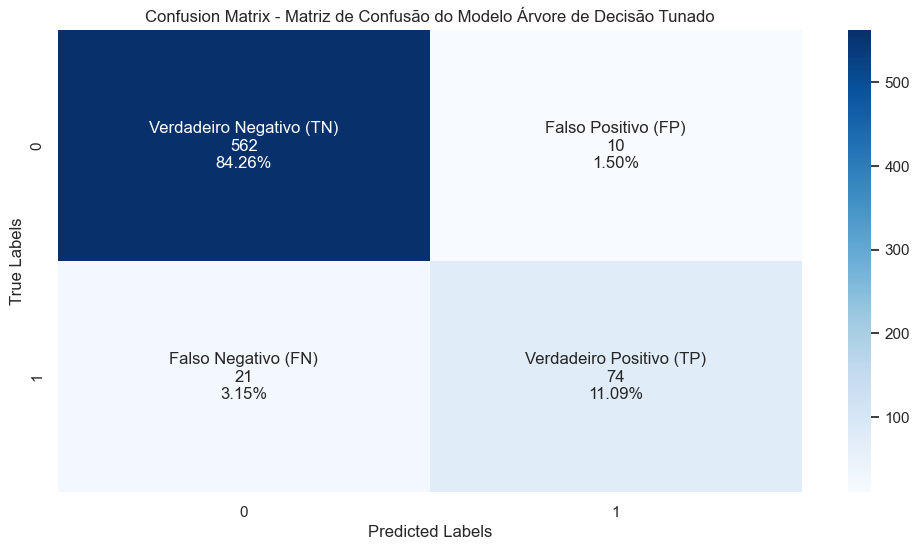

In [252]:
cm = confusion_matrix(y_test, modelo_dt_tunado.predict(x_test))
nomes = ['Verdadeiro Negativo (TN)','Falso Positivo (FP)','Falso Negativo (FN)','Verdadeiro Positivo (TP)']
counts = [value for value in cm.flatten()]
porcentagens = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(nomes, counts, porcentagens)]
labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize = (12, 6))
sns.heatmap(cm, annot = labels, cmap = 'Blues', fmt ='')
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels')     
plt.title('Confusion Matrix - Matriz de Confusão do Modelo Árvore de Decisão Tunado') 
plt.show();

Na **Matriz de Confusão** (Confusion Matriz), da base de teste, acima, podemos verificar que:

- Temos um total de 667 observações. 95 (21 + 74) observações apresentam a classificação 1 para a Variável Churn. Ou seja, 95 observações da base de teste referem-se a clientes que cancelaram o serviço ("deram churn").

- Temos um total de 667 observações. 572 (562 + 10) observações apresentam a classificação 0 para a Variável Churn. Ou seja, 572 observações da base de teste referem-se a clientes que cancelaram o serviço ("deram churn").

- **Verdadeiro Positivo (TP - True Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **74** observações Verdadeiro Positivo. Ou seja, observações que o Modelo de Árvore de Decisão previu que seriam positivas (dar churn) e de fato foram positivas.

- **Falso Positivo (FP - False Positive)**: Considerando a base de teste, verificamos que o Modelo identificou **10** observações Falso Positivo. Ou seja, observações que o Modelo de Árvore de Decisão previu que seriam positivas (dar churn), mas, de fato, foram negativas (não deram churn). O Falso Positivo também é conhecido como Erro do Tipo I.

- **Verdadeiro Negativo (TN - True Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **562** observações Verdadeiro Negativo. Ou seja, observações que o Modelo de Árvore de Decisão previu que seriam negativas (não dar churn) e de fato foram negativas.

- **Falso Negativo (FN - False Negative)**: Considerando a base de teste, verificamos que o Modelo identificou **21** observações Falso Negativo. Ou seja, observações que o Modelo de Árvore de Decisão previu que seriam negativas (não dar churn), mas, de fato, foram positivas (deram churn). O Falso Negativo também é conhecido como Erro do Tipo II.

### Curva ROC do melhor modelo treinado

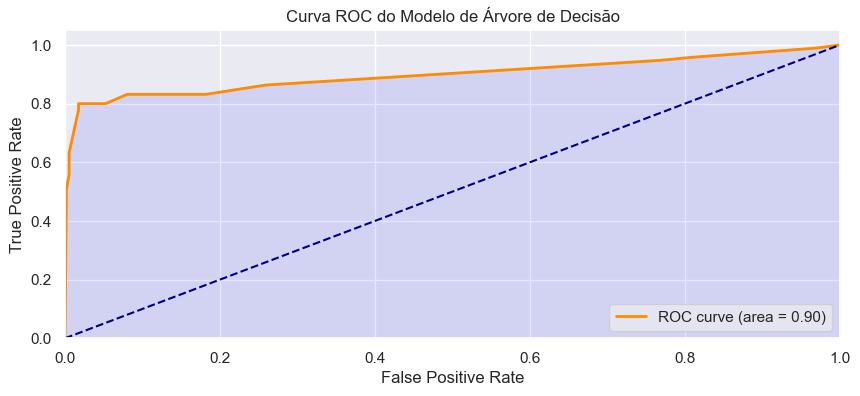

In [255]:
# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC do Modelo de Árvore de Decisão')
plt.legend(loc='lower right')
plt.fill_between(fpr,tpr,color='blue',alpha= 0.1,label = 'AUC = Área Abaixo da Curva ROC')
plt.grid(True)

- No gráfico acima, nós temos **no Eixo Y** o **True Positive Rate (TPR)** que nada mais é que a métrica de desempenho **Recall**. Ou seja, de todas as classificações que, de fato, foram positivas, quantas o modelo previu que seriam positivas.
  
- No **Eixo X** nós temos a **False Positive Rate**. Ela é calculada como 1 - True Negative Rate (TNR). A TNR é a divisão dos Verdadeiros Negativos (TN) pela soma dos Verdadeiros Negativos (TN) com os Falsos Positivos (FP). Ou seja, a True Negative Rate nos retorna de todas as classificações que, de fato, foram negativas, quantas o modelo previu que seriam negativas.
  
- Um modelo de classificação perfeito teria 100% de True Positive Rate (TPR) e 100% de True Negative Rate (TNR). Ou seja, esse modelo perfeito não apresentaria Falsos Positivos e nem Falsos Negativos.
  
- Por isso que o Eixo X do gráfico acima é 1 - True Negative Rate (TNR). Porque iremos calcular a área desse gráfico para obtermos uma medida de performance do modelo. Assim, quanto mais próxima à diagonal superior esquerda do gráfico, maior será a área abaixo da curva. Essa será a área de um modelo perfeito, em que a True Positive Rate (no Eixo Y) será de 100% e 1 - True Negative Rate (TNR) será de 0% (no Eixo X), já que, nesse modelo perfeito, a TNR será de 100%.
  
- A curva laranja do gráfico acima é conhecida como Curva ROC (Receiver Operating Characteristic Curve. Em português, Curva Característica de Operação do Receptor). E a área abaixo dessa curva é conhecida como AUC, ou AUROC (Area Under Curve. Ou seja, área abaixo da curva ROC). Quanto maior for o indicador AUC, maior será a capacidade do modelo de identificar Verdadeiros Positivos e Verdadeiros Negativos e menores serão os Falsos Positivos e Falsos Negativos.  

### Função para cálculo de probabilidade de Churn para um cliente específico

In [258]:
def calcular_probabilidade_churn(modelo, state, account_length, area_code, international_plan, voice_mail_plan,
                                 number_vmail_messages, total_day_minutes, total_day_calls, total_day_charge,
                                 total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes,
                                 total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls,
                                 total_intl_charge, customer_service_calls, colunas_do_treino):
    
    # Criar o DataFrame do cliente com uma linha
    cliente = pd.DataFrame({
        'Account length': [account_length],
        'Area code': [area_code],
        'Number vmail messages': [number_vmail_messages],
        'Total day minutes': [total_day_minutes],
        'Total day calls': [total_day_calls],
        'Total day charge': [total_day_charge],
        'Total eve minutes': [total_eve_minutes],
        'Total eve calls': [total_eve_calls],
        'Total eve charge': [total_eve_charge],
        'Total night minutes': [total_night_minutes],
        'Total night calls': [total_night_calls],
        'Total night charge': [total_night_charge],
        'Total intl minutes': [total_intl_minutes],
        'Total intl calls': [total_intl_calls],
        'Total intl charge': [total_intl_charge],
        'Customer service calls': [customer_service_calls],
        'State': [state],
        'International plan': [international_plan],
        'Voice mail plan': [voice_mail_plan]
    })

    # Aplicar get_dummies no cliente, drop_first=True para manter consistência
    cliente_transformado = pd.get_dummies(cliente, drop_first=True)

    # Reindexar o DataFrame para garantir que ele tenha todas as colunas do treino, preenchendo com 0 as faltantes
    cliente_transformado = cliente_transformado.reindex(columns=colunas_do_treino, fill_value=0)

    # Verificar se o número de features está correto
    if cliente_transformado.shape[1] != len(colunas_do_treino):
        raise ValueError(f"O número de features ({cliente_transformado.shape[1]}) não corresponde ao do modelo ({len(colunas_do_treino)})")

    # Calcular a probabilidade de churn
    probabilidade_churn = modelo.predict_proba(cliente_transformado)

    # A probabilidade de churn é o valor da segunda classe (índice 1)
    return probabilidade_churn[0][1]

In [259]:
# Lista de colunas do treinamento (incluindo dummies geradas por get_dummies com drop_first=True)
colunas_do_treino = [
    'Account length', 'Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes',
    'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge',
    'Customer service calls', 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
    'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
    'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME', 'State_MI',
    'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
    'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
    'State_RI', 'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT',
    'State_WA', 'State_WI', 'State_WV', 'State_WY', 'International plan_Yes', 'Voice mail plan_Yes'
]

#### Cálculo da probabilidade de Churn para um cliente específico

In [469]:
# Exemplo de dados de um cliente
probabilidade = calcular_probabilidade_churn(
    modelo_dt_tunado, 'NJ', 107, 415, 'Yes', 'No', 26, 140, 150, 50, 
    195.5, 103, 16.62, 254.4, 103, 11.45, 13.7, 3, 3.7, 4, colunas_do_treino
)

print(f"Probabilidade de Churn: {probabilidade*100:.2f}%")

Probabilidade de Churn: 73.33%


### Conclusões e propostas de ações

- Nota-se, pela Análise Exploratória de Dados (EDA) e pela análise dos Modelos de Machine Learning, que dentre as variáveis disponibilizadas algumas apresentam **maior importância para explicar o índice de Churn**, como **'Total day minutes', 'Customer service calls' e 'International Plan'**. Assim, recomenda-se que a empresa **foque a atenção de seus planos de ação sob a ótica dessas variáveis**.

- É de extrema importância que a empresa **adote um bom modelo de Machine Learning de Classificação** para prever os clientes com maior probabilidade de cancelarem o serviço (de 'darem churn'), **afim de atuar com antecedência sobre esses clientes, propondo condições especiais para manterem esses clientes na base**.

- A métrica **Recall é uma boa medida de avaliação** do desempenho de modelos de Classsificação que avaliam Churn, uma vez que para muitas empresas **a perda de clientes pela não identificação de potenciais canceladores será mais impactante para o negócio do que o custo de oportunidade de oferecer condições especiais para clientes que provavelmente continuariam com o serviço**.

In [483]:
import pickle

In [485]:
filename = 'churn.pkl'
pickle.dump(modelo_dt_tunado,open(filename,'wb'))